# Analysis of rod_cleaned_final.csv
- distribution of all the variables are plotted
- correlation plots are created
- decision tree is created

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/rod_cleaned_final.csv')

# Distribution Plots for Numerical Variables
### Operational Parameters:

    avg_press_flowline (Average pressure in flowline)
    avg_press_tubing (Average pressure in tubing)
    avg_press_casing (Average pressure in casing)
    avg_diff_press (Average differential pressure)
    stroke_len (Stroke length)
    gross_stroke_len (Gross stroke length)
    fillage (Pump fillage efficiency)
    yesterday_avg_spm (Strokes per minute)
    max_incline (Max wellbore inclination)

### Production Metrics:

    avg_oil_vol (Average oil volume produced)
    avg_water_vol (Average water volume produced)
    avg_liquid_vol (Average total liquid volume produced)

### Mechanical Metrics:

    max_unguided_dls (Dog leg severity)
    overall_max_sideload (Overall maximum sideload)
    max_unguided_sideload (Max unguided sideload)
    enduralloy_len (Length of Enduralloy-coated sections)
    nip_set_depth (Nipple set depth)

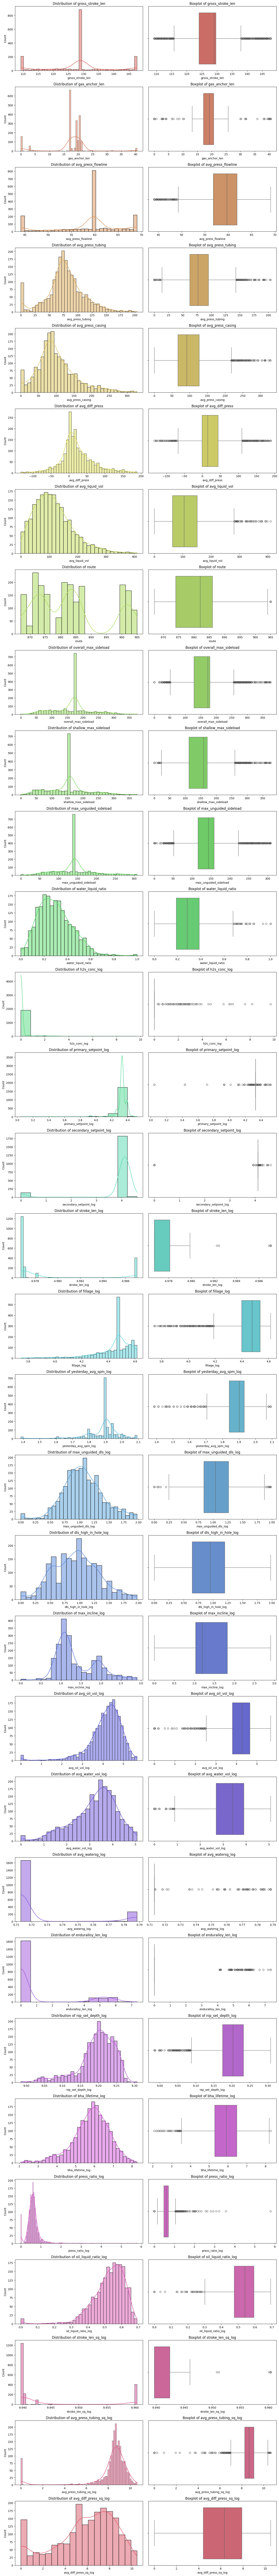

In [4]:
df_numeric = df.select_dtypes(include = 'number')

# Set up subplots
fig, axes = plt.subplots(len(df_numeric.columns), 2, figsize=(14, len(df_numeric.columns) * 4))

palette = sns.color_palette("hls", len(df_numeric.columns))

for i, col in enumerate(df_numeric.columns):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color=palette[i])
    axes[i, 0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color=palette[i])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [5]:
"""Commented out old distribution plots but kept just in case"""
# # Define numeric variables with descriptions

# # WILL IMPLEMENT A FUNCTION THAT CONNECTS
# # THE DESCRIPTION CSV FILE TO THIS
# # SO WE DON'T HAVE TO HARD CODE IT

# numeric_vars = {
#     'avg_press_flowline': "Avg pressure at the flowline, indicating backpressure effects.",
#     'avg_press_tubing': "Avg tubing pressure inside the production tubing.",
#     'avg_diff_press': "Difference between tubing and flowline pressure, helps detect restrictions.",
#     'stroke_len': "Length of a single stroke in the rod pump.",
#     'gross_stroke_len': "Total stroke length (upstroke + downstroke).",
#     'fillage': "Percentage of pump barrel filled with fluid per stroke.",
#     'yesterday_avg_spm': "Avg strokes per minute (SPM) from the previous day.",
#     'avg_oil_vol': "Avg volume of oil produced over time.",
#     'avg_water_vol': "Avg volume of water produced, indicating water cut.",
#     'avg_liquid_vol': "Total produced liquids (oil + water)."
# }

# df_numeric = df.select_dtypes(include = 'number')

# # Set up subplots
# fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(14, len(numeric_vars) * 4))

# for i, (var, description) in enumerate(numeric_vars.items()):
#     # Histogram
#     sns.histplot(df[var], kde=True, ax=axes[i, 0])
#     axes[i, 0].set_title(f'Distribution of {var}')
#     axes[i, 0].annotate(description, xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, 
#                          color='black', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", alpha=0.1))

#     # Boxplot
#     sns.boxplot(x=df[var], ax=axes[i, 1])
#     axes[i, 1].set_title(f'Boxplot of {var}')
#     axes[i, 1].annotate(description, xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, 
#                          color='black', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", alpha=0.1))

# plt.tight_layout()
# plt.show()

'Commented out old distribution plots but kept just in case'

<!-- Now let's go ahead and show some big correlations -->

# Correlation Plots
- heatmap
- boxplots
- linear regression plots

In [6]:
"""Commented out old heatmap, but kept just in case"""
# plt.figure(figsize=(12, 10))
# numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'max_incline', 'max_unguided_dls', 'overall_max_sideload', 'max_unguided_sideload', 'enduralloy_len', 'nip_set_depth']
# correlation_matrix = df[numeric_vars].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

# # Pairplot for key variables
# sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len', 'avg_oil_vol'], hue='failure_type')
# plt.show()

'Commented out old heatmap, but kept just in case'

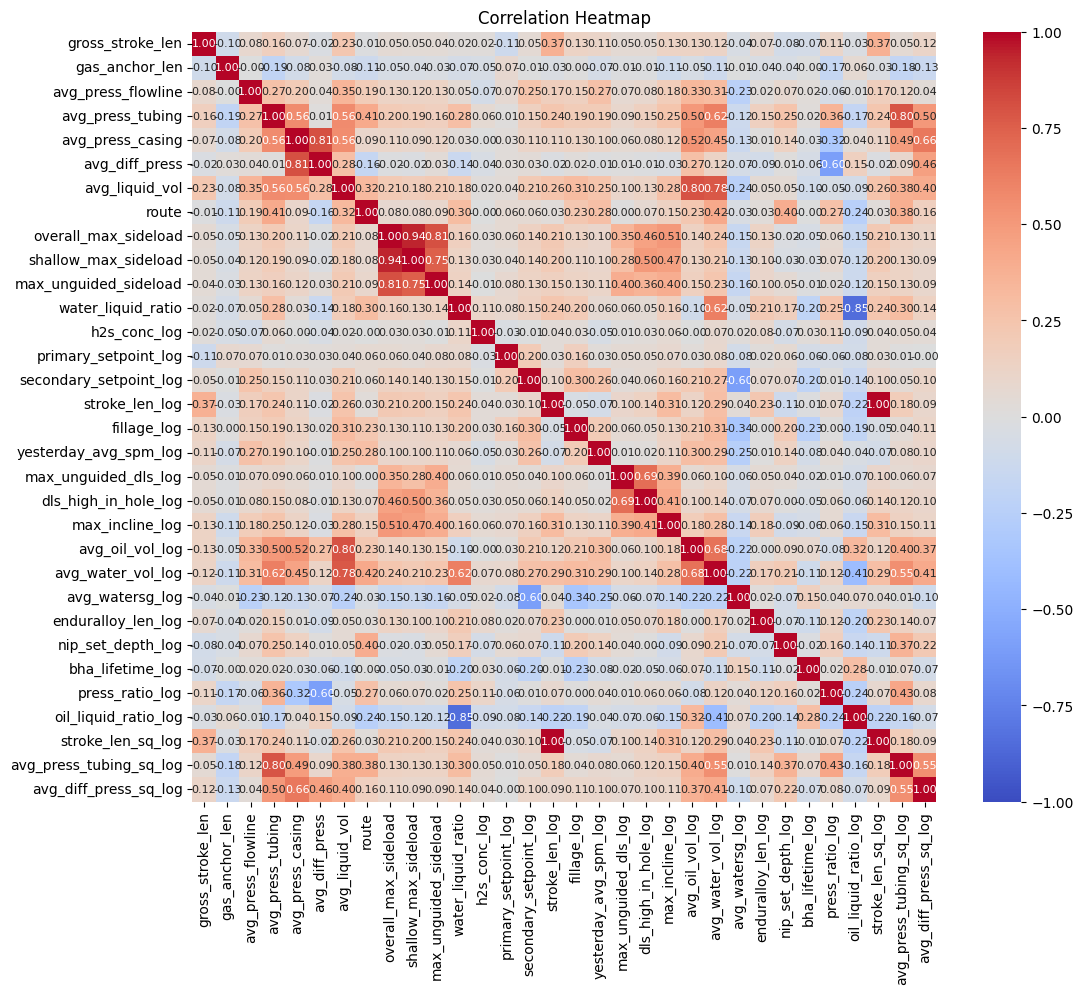

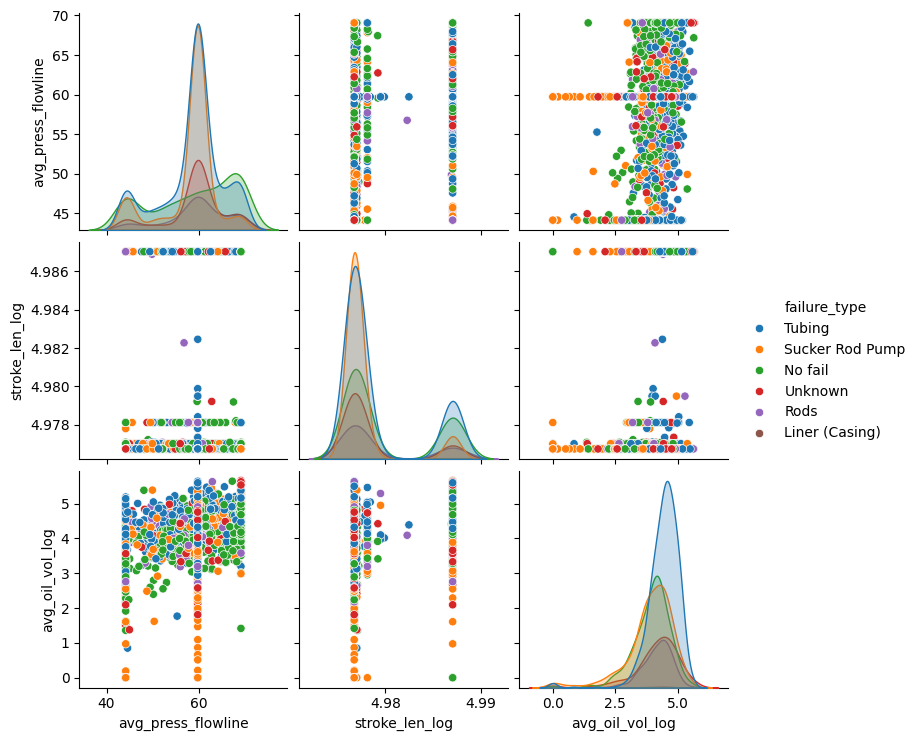

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len_log', 'avg_oil_vol_log'], hue='failure_type')
plt.show()

In [8]:
# Create a mask to remove the duplicate correlations (lower triangle)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Flatten the correlation matrix, remove self-correlation (correlation of a variable with itself)
correlation_values = correlation_matrix.where(~mask).stack()

# Now, you can extract the top correlations correctly, both positive and negative
sorted_correlations = correlation_values.sort_values(ascending=False)

# Display the top positive correlations
top_positive_correlations = sorted_correlations[sorted_correlations > 0].head(5)

# For negative correlations, sort in ascending order (most negative first)
top_negative_correlations = sorted_correlations[sorted_correlations < 0].sort_values(ascending=True).head(5)

# Display the correlation pairs with their corresponding variables
print("Top Positive Correlations:")
for index, value in top_positive_correlations.items():
    print(f'{index[0]} | {index[1]}: {value}')

print("\nTop Negative Correlations:")
for index, value in top_negative_correlations.items():
    print(f'{index[0]} | {index[1]}: {value}')


Top Positive Correlations:
stroke_len_sq_log | stroke_len_log: 0.9999999999967002
shallow_max_sideload | overall_max_sideload: 0.9403408323569241
avg_diff_press | avg_press_casing: 0.805709884899204
max_unguided_sideload | overall_max_sideload: 0.8052683713039448
avg_oil_vol_log | avg_liquid_vol: 0.8030405554070581

Top Negative Correlations:
oil_liquid_ratio_log | water_liquid_ratio: -0.8452839420383289
avg_watersg_log | secondary_setpoint_log: -0.5996427117419626
press_ratio_log | avg_diff_press: -0.598227138238514
oil_liquid_ratio_log | avg_water_vol_log: -0.4128996639508673
avg_watersg_log | fillage_log: -0.34022575082898704


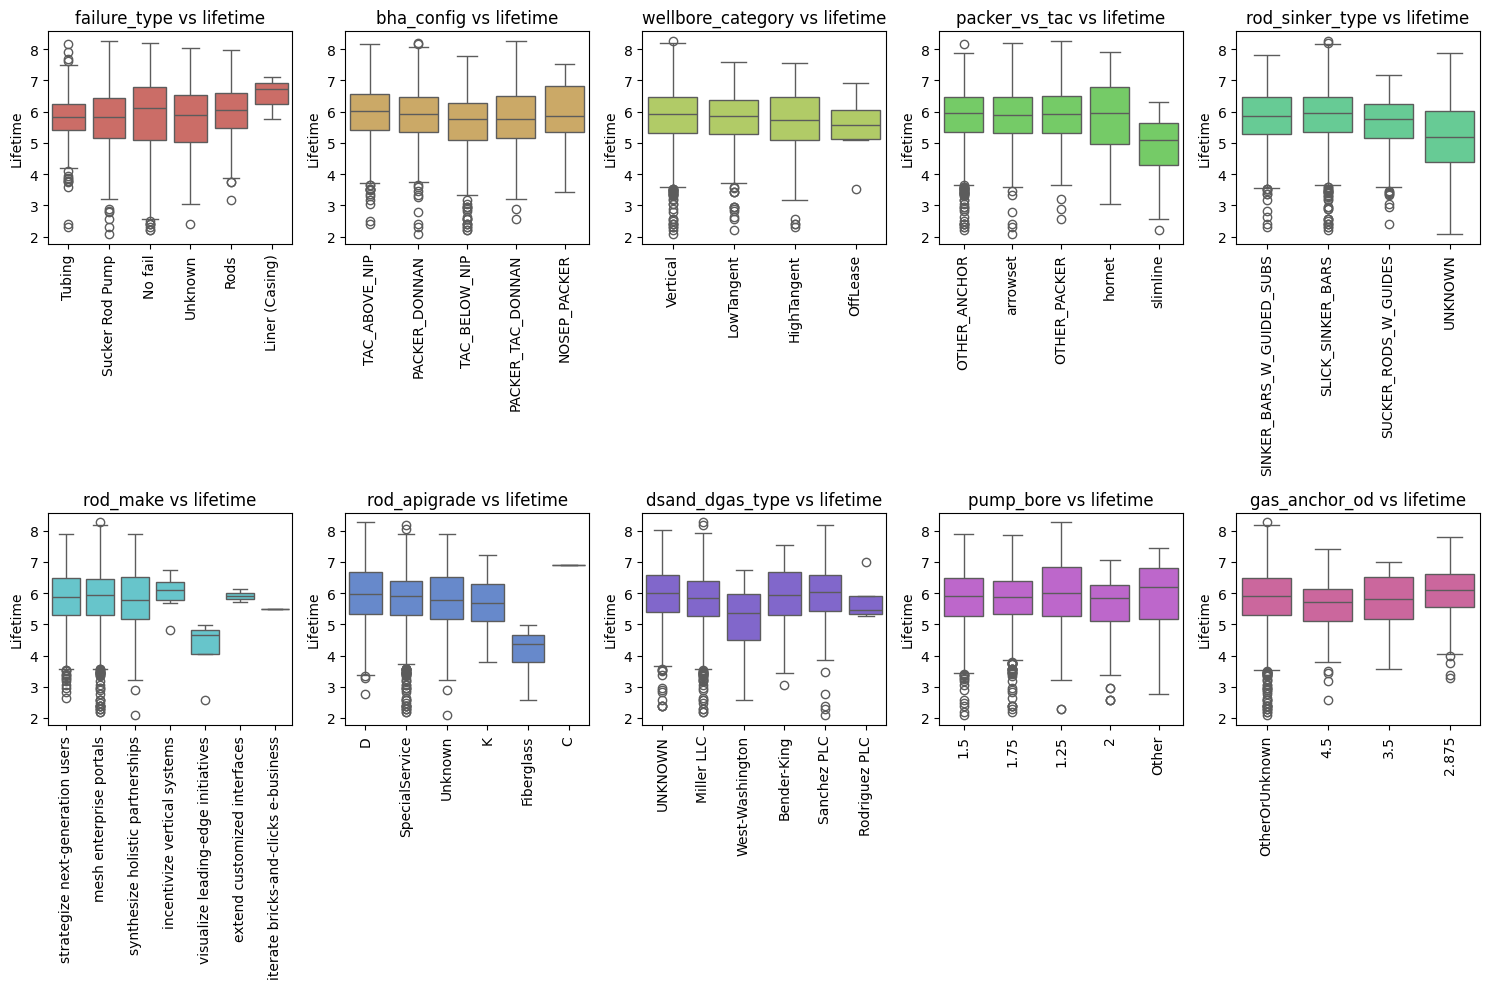

In [9]:
df_cat = df.select_dtypes(include = 'object')
for col in df_cat.columns:
    if len(df_cat[col].unique()) >= 10:
        df_cat.drop(col, axis = 1, inplace = True)

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

palette = sns.color_palette("hls", len(df_cat.columns))

for i, col in enumerate(df_cat.columns):
    sns.boxplot(data=df, x=col, y='bha_lifetime_log', ax=axes[i], color=palette[i])
    axes[i].set_title(f'{col} vs lifetime', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Lifetime', fontsize=10)

# Remove any unused axes if the number of columns is less than the number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


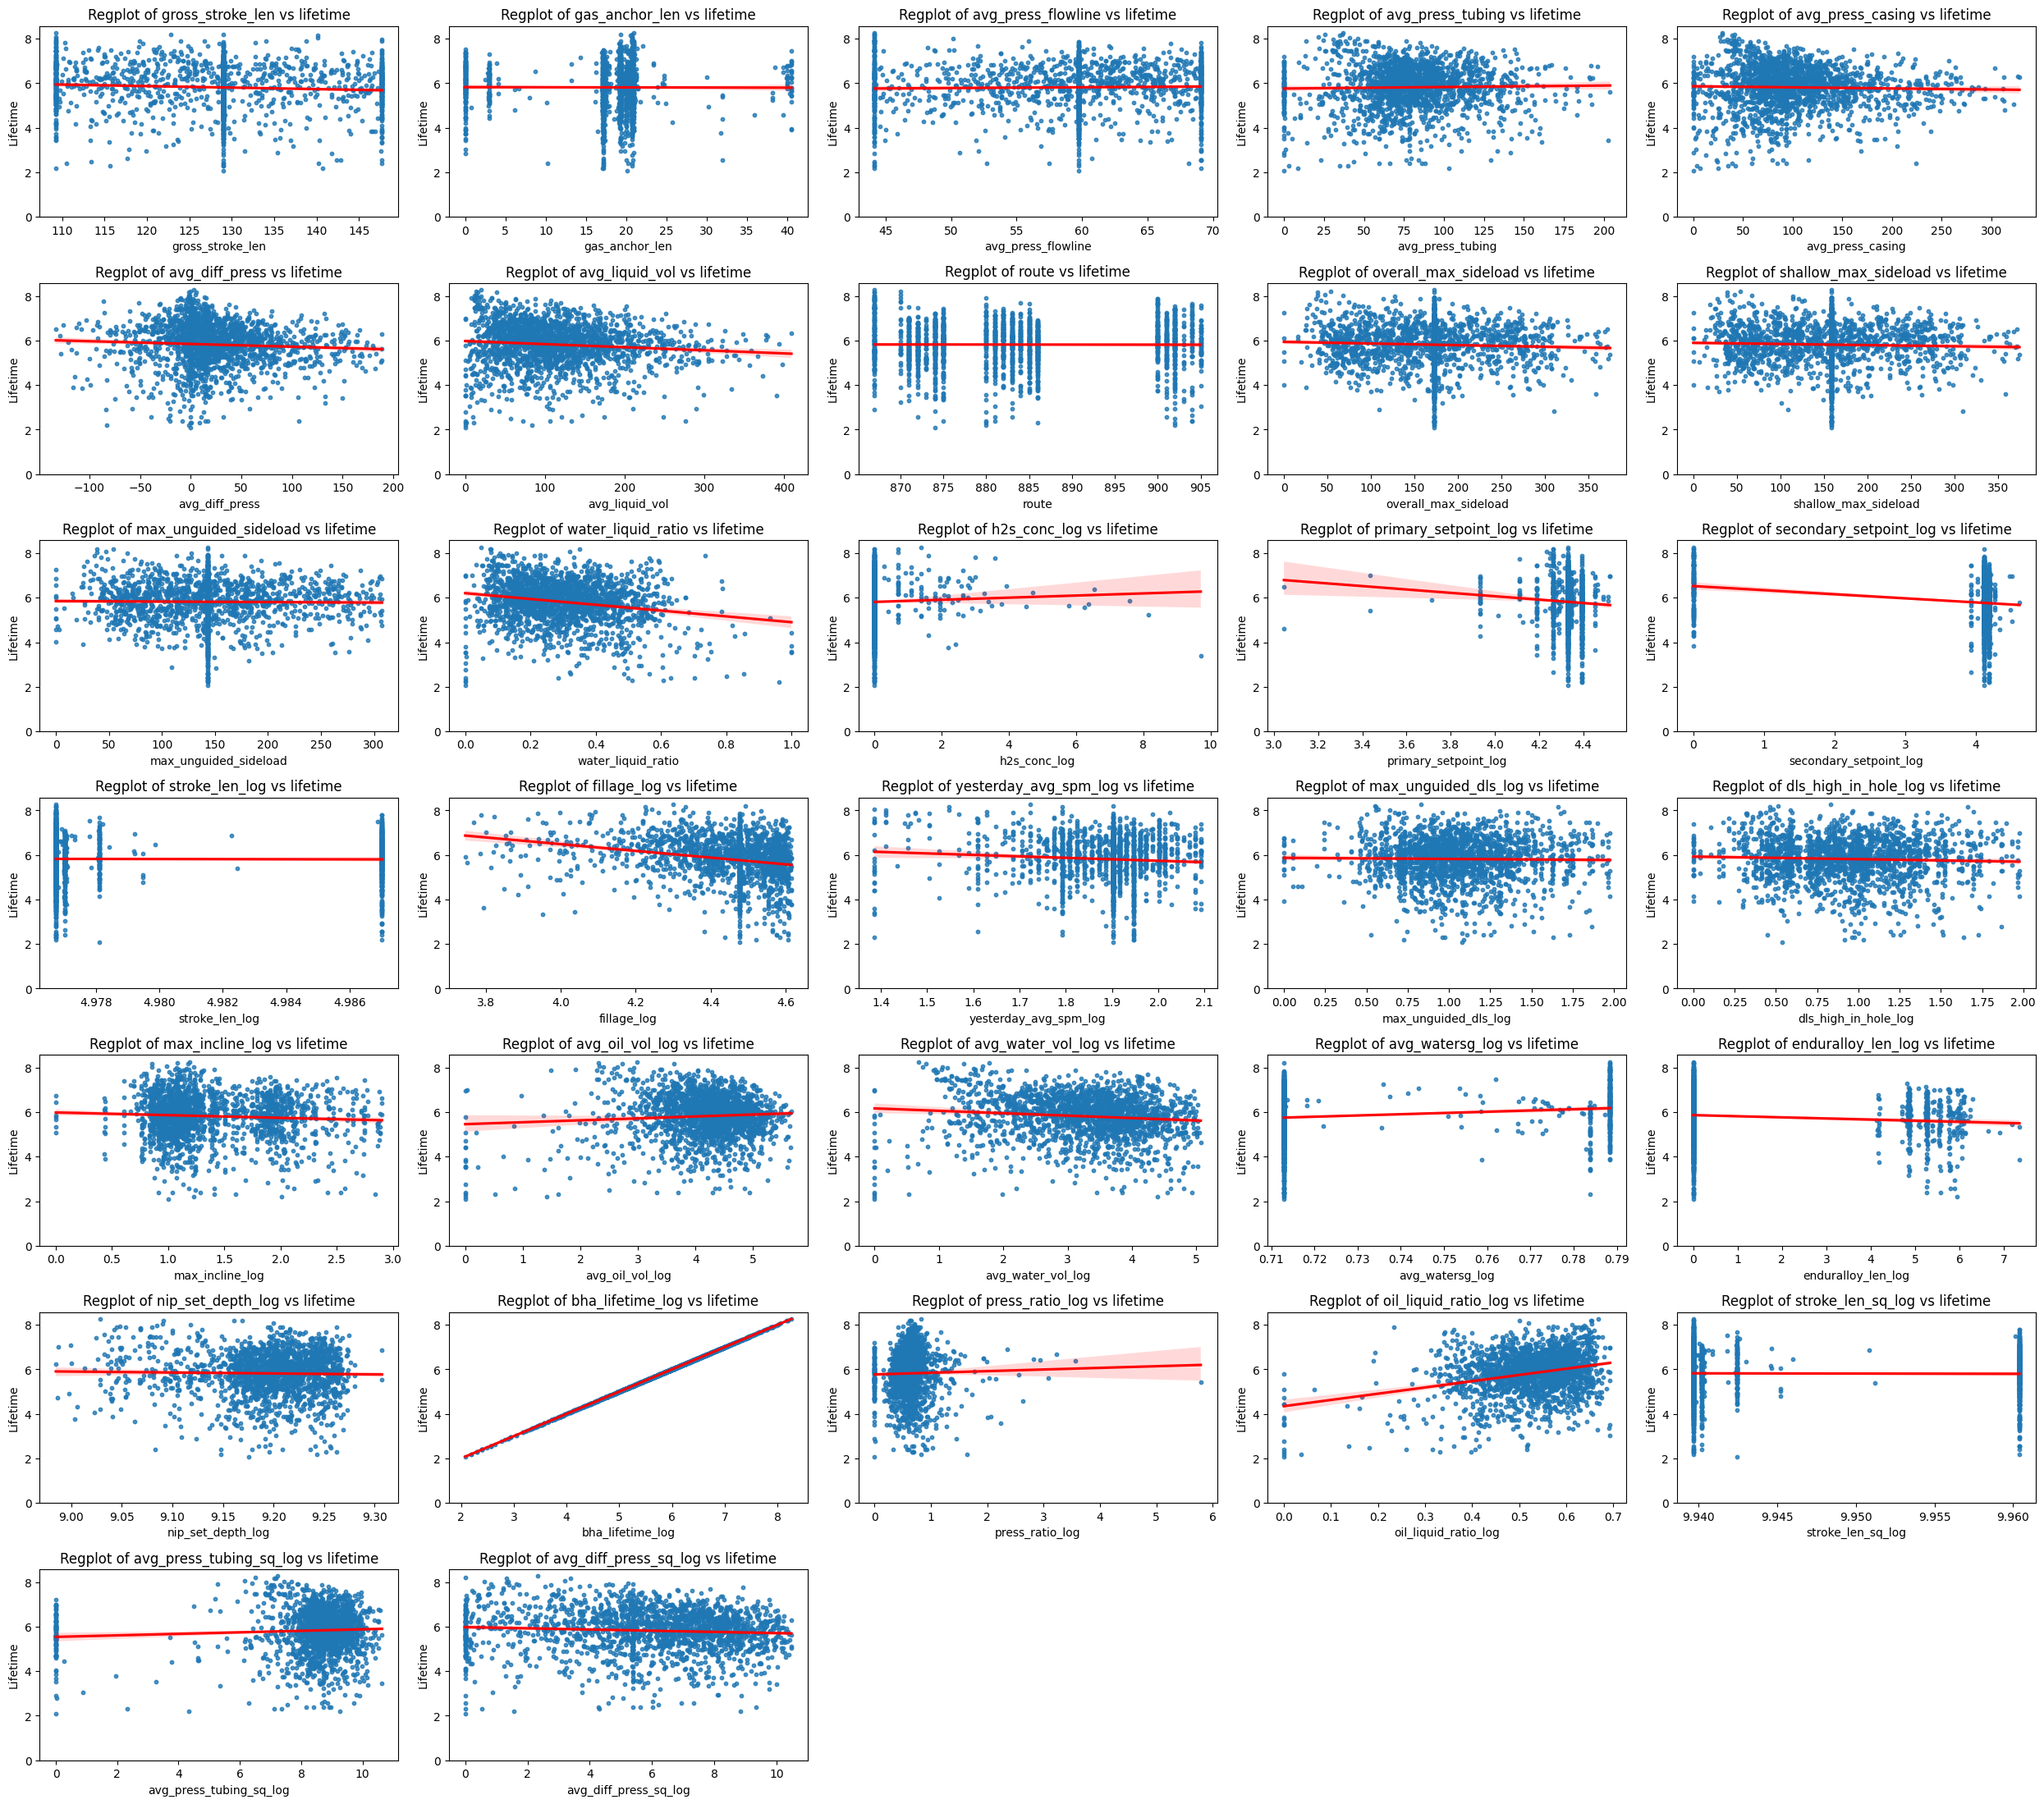

In [10]:
"""Should do for each unique rod pump because otherwise the linear regression plots look wack
It appears that there are a lot of discrete values that I think are from the same rod pumps"""

fig, axes = plt.subplots(len(df_numeric.columns), 5, figsize=(25, 100))  # Adjust the height as needed
axes = axes.flatten()

# Iterate through the continuous columns and create regression plots
for i, col in enumerate(df_numeric.columns):
    sns.regplot(x=col, y='bha_lifetime_log', data=df, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[i].set_title(f'Regplot of {col} vs lifetime', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x')  # Rotate x-axis labels if needed
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Lifetime', fontsize=10)
    axes[i].set_ylim(0,)  # Set the y-axis limit to start at 0 (optional)

# Remove any unused axes if the number of columns is less than the number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


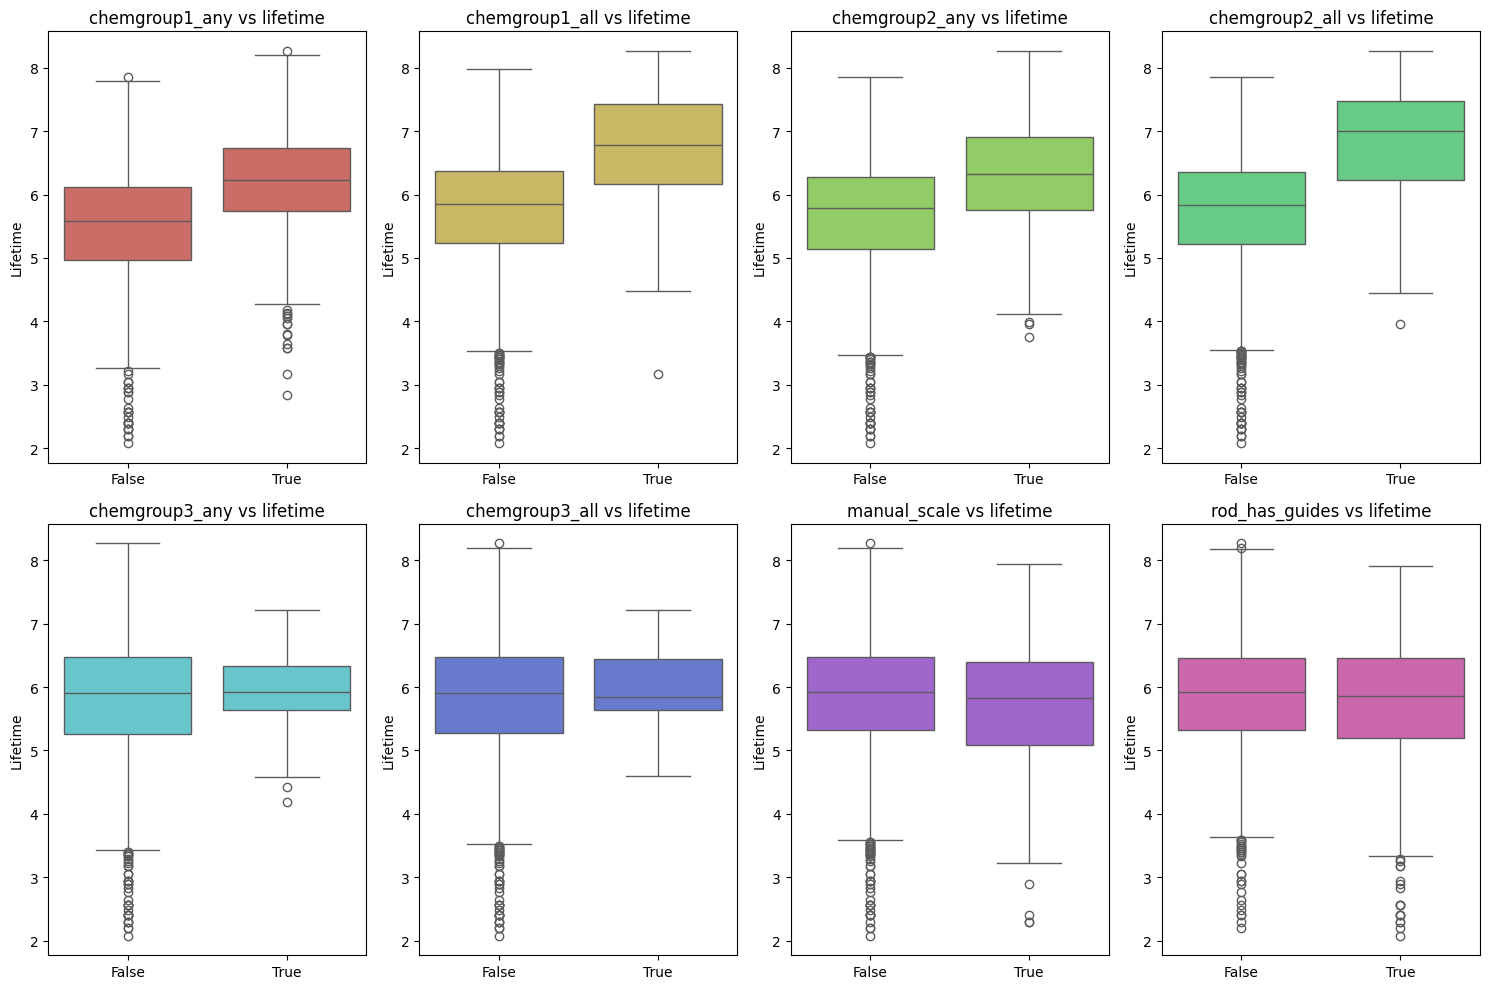

In [11]:
df_bool = df.select_dtypes(include = 'bool')

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

palette = sns.color_palette("hls", len(df_bool.columns))

for i, col in enumerate(df_bool.columns):
    sns.boxplot(data=df, x=col, y='bha_lifetime_log', ax=axes[i], color=palette[i])
    axes[i].set_title(f'{col} vs lifetime', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x')
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Lifetime', fontsize=10)

# Remove any unused axes if the number of columns is less than the number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# Clean the failure_type column to remove any extra spaces and normalize case
df['failure_type'] = df['failure_type'].str.strip().str.title()

# List of failure types
failure_types = ['Tubing', 'Sucker Rod Pump', 'Rods']

# Loop through each failure type
for failure in failure_types:
    # Filter the data for the current failure type
    failure_data = df[df['failure_type'] == failure]

    # Ensure there are no NaN values that could affect correlation
    failure_data_clean = failure_data[df_numeric.columns].dropna()

    # Calculate the correlation matrix for this failure type
    if len(failure_data_clean) > 1:  # Ensure there is more than one row to compute correlations
        corr_matrix = failure_data_clean.corr()

        # Flatten the correlation matrix and sort by absolute value to get the top correlations
        corr_flat = corr_matrix.unstack().sort_values(ascending=False, key=abs)

        # Remove self-correlations (correlation of a variable with itself)
        corr_flat = corr_flat[corr_flat != 1]

        # Get the top 12 correlations
        top_12_corr = corr_flat.head(12)

        # Print the top 12 correlations for each failure type
        print(f"Top 12 Correlations for Failure Type: {failure}")
        print(top_12_corr)
        print("\n" + "-"*50 + "\n")  # Separator for better readability
    else:
        print(f"Not enough data for failure type: {failure}\n")


Top 12 Correlations for Failure Type: Tubing
stroke_len_sq_log      stroke_len_log           1.000000
stroke_len_log         stroke_len_sq_log        1.000000
overall_max_sideload   shallow_max_sideload     0.931464
shallow_max_sideload   overall_max_sideload     0.931464
avg_press_casing       avg_diff_press           0.856973
avg_diff_press         avg_press_casing         0.856973
water_liquid_ratio     oil_liquid_ratio_log    -0.850664
oil_liquid_ratio_log   water_liquid_ratio      -0.850664
overall_max_sideload   max_unguided_sideload    0.809023
max_unguided_sideload  overall_max_sideload     0.809023
avg_liquid_vol         avg_oil_vol_log          0.789075
avg_oil_vol_log        avg_liquid_vol           0.789075
dtype: float64

--------------------------------------------------

Top 12 Correlations for Failure Type: Sucker Rod Pump
stroke_len_sq_log        stroke_len_log             1.000000
stroke_len_log           stroke_len_sq_log          1.000000
shallow_max_sideload     ov

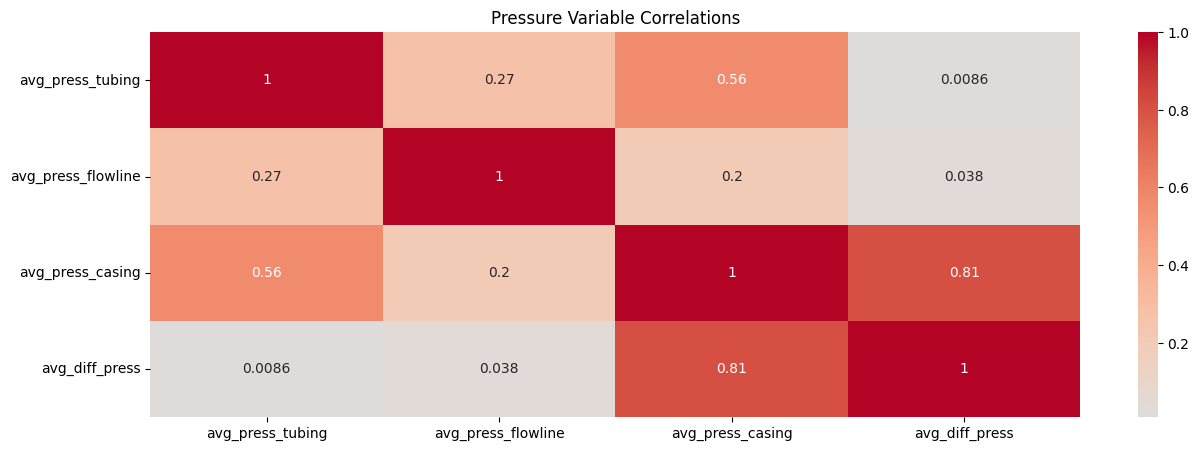


Summary Statistics by Failure Type:
                 overall_max_sideload  avg_liquid_vol  h2s_conc_log  \
failure_type                                                          
Liner (Casing)                 140.91           81.49          0.00   
No Fail                        166.13          101.06          0.12   
Rods                           176.37          113.90          0.10   
Sucker Rod Pump                150.39           87.39          0.06   
Tubing                         172.63          141.09          0.15   
Unknown                        158.51          114.39          0.12   

                 avg_press_tubing  
failure_type                       
Liner (Casing)              29.00  
No Fail                     82.98  
Rods                        82.71  
Sucker Rod Pump             61.36  
Tubing                      84.88  
Unknown                     80.09  


In [13]:
def analyze_pressure_relationships(df):
    plt.figure(figsize=(15, 5))
    
    # Plot pressure correlations
    pressure_vars = ['avg_press_tubing', 'avg_press_flowline', 
                    'avg_press_casing', 'avg_diff_press']
    
    corr_pressure = df[pressure_vars].corr()
    
    sns.heatmap(corr_pressure, annot=True, cmap='coolwarm', center=0)
    plt.title('Pressure Variable Correlations')
    plt.show()

# Run the analyses
analyze_pressure_relationships(df)

# Print summary statistics for each failure type
print("\nSummary Statistics by Failure Type:")
failure_stats = df.groupby('failure_type').agg({
    'overall_max_sideload': 'mean',
    'avg_liquid_vol': 'mean',
    'h2s_conc_log': 'mean',
    'avg_press_tubing': 'mean'
}).round(2)

print(failure_stats)

<!-- Liner (Casing) Failures:


Has the lowest sideload (77.52) of all failure types
Moderate liquid volume (98.07)
No H2S concentration (0.00)
Lowest tubing pressure (21.75)
Interpretation: These failures seem to occur in relatively low-stress conditions, suggesting they might be more related to wear and tear or material issues than operational stress


Rod Failures:


Highest sideload (228.06) of all types
High liquid volume (114.53)
Low H2S concentration (0.41)
High tubing pressure (83.82)
Interpretation: Rod failures appear strongly connected to mechanical stress (high sideload) and operational intensity (high volumes and pressure)


Sucker Rod Pump Failures:


Moderate sideload (158.99)
Lowest liquid volume (94.46)
Moderate H2S concentration (1.99)
Moderate tubing pressure (71.14)
Interpretation: These failures show balanced stress across parameters, suggesting they might be more related to normal wear and tear


Tubing Failures:
High sideload (202.03)
Highest liquid volume (135.86)
Highest H2S concentration (14.23)
Highest tubing pressure (91.75)
Interpretation: These failures occur under the most severe conditions - high mechanical stress, high volumes, corrosive conditions (H2S), and high pressure -->


# Decision Tree

In [14]:
"""Commented out old decision tree but kept just in case"""
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import plot_tree
# df_cleaned = df.dropna()

# X = df_cleaned[['avg_watersg_log', 'enduralloy_len_log', 'nip_set_depth_log', 'avg_press_flowline', 
#         'avg_press_tubing', 'avg_press_casing', 'avg_oil_vol_log', 'avg_water_vol_log']]

# y = df_cleaned['bha_lifetime_log']  # This is the target variable


# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest model with max_leaf_nodes set to 6
# model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=15, random_state=42)

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Display the first tree of the random forest
# plt.figure(figsize=(20, 10))
# plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True)
# plt.show()

# # Display feature importances to see the most important variables
# print("Feature importances:", model.feature_importances_)

# # Optionally: Evaluate the model performance (e.g., R2 score, Mean Squared Error)
# from sklearn.metrics import mean_squared_error, r2_score

# # Calculate MSE and R^2
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")


'Commented out old decision tree but kept just in case'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Drop non-relevant or unique identifier columns
drop_cols = ['rod_uid', 'uwi', 'well_name', 'well_id', 'bha_tubing_id', 
             'bha_lifetime_start', 'bha_lifetime_end', 'bha_lifetime_id']

df = df.drop(columns=drop_cols, errors='ignore')  # Ignore errors if columns don't exist

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns  # Automatically detect categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings before encoding
    label_encoders[col] = le

In [17]:
# Split into features and target variable
X = df.drop(columns=['bha_lifetime_log'])
y = df['bha_lifetime_log']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to retain feature names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [175],  # Number of trees in the forest
    'max_depth': [5, 7, 9],         # Maximum depth of the trees
    'min_samples_split': [2, 4],       # Minimum samples required to split a node
    'min_samples_leaf': [2, 3, 4],         # Minimum samples required at a leaf node
    'max_features': ['log2', 'sqrt', None],  # Number of features to consider for splitting a node
    'bootstrap': [True, False]             # Whether to use bootstrap samples when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                       n_iter=50, cv=3, scoring='neg_mean_squared_error', 
                                       n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
randomized_search.fit(X_train, y_train)

# Best parameters found from random search
print("Best parameters found: ", randomized_search.best_params_)

# Get the best model from random search
best_rf_model = randomized_search.best_estimator_

# Train predictions using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

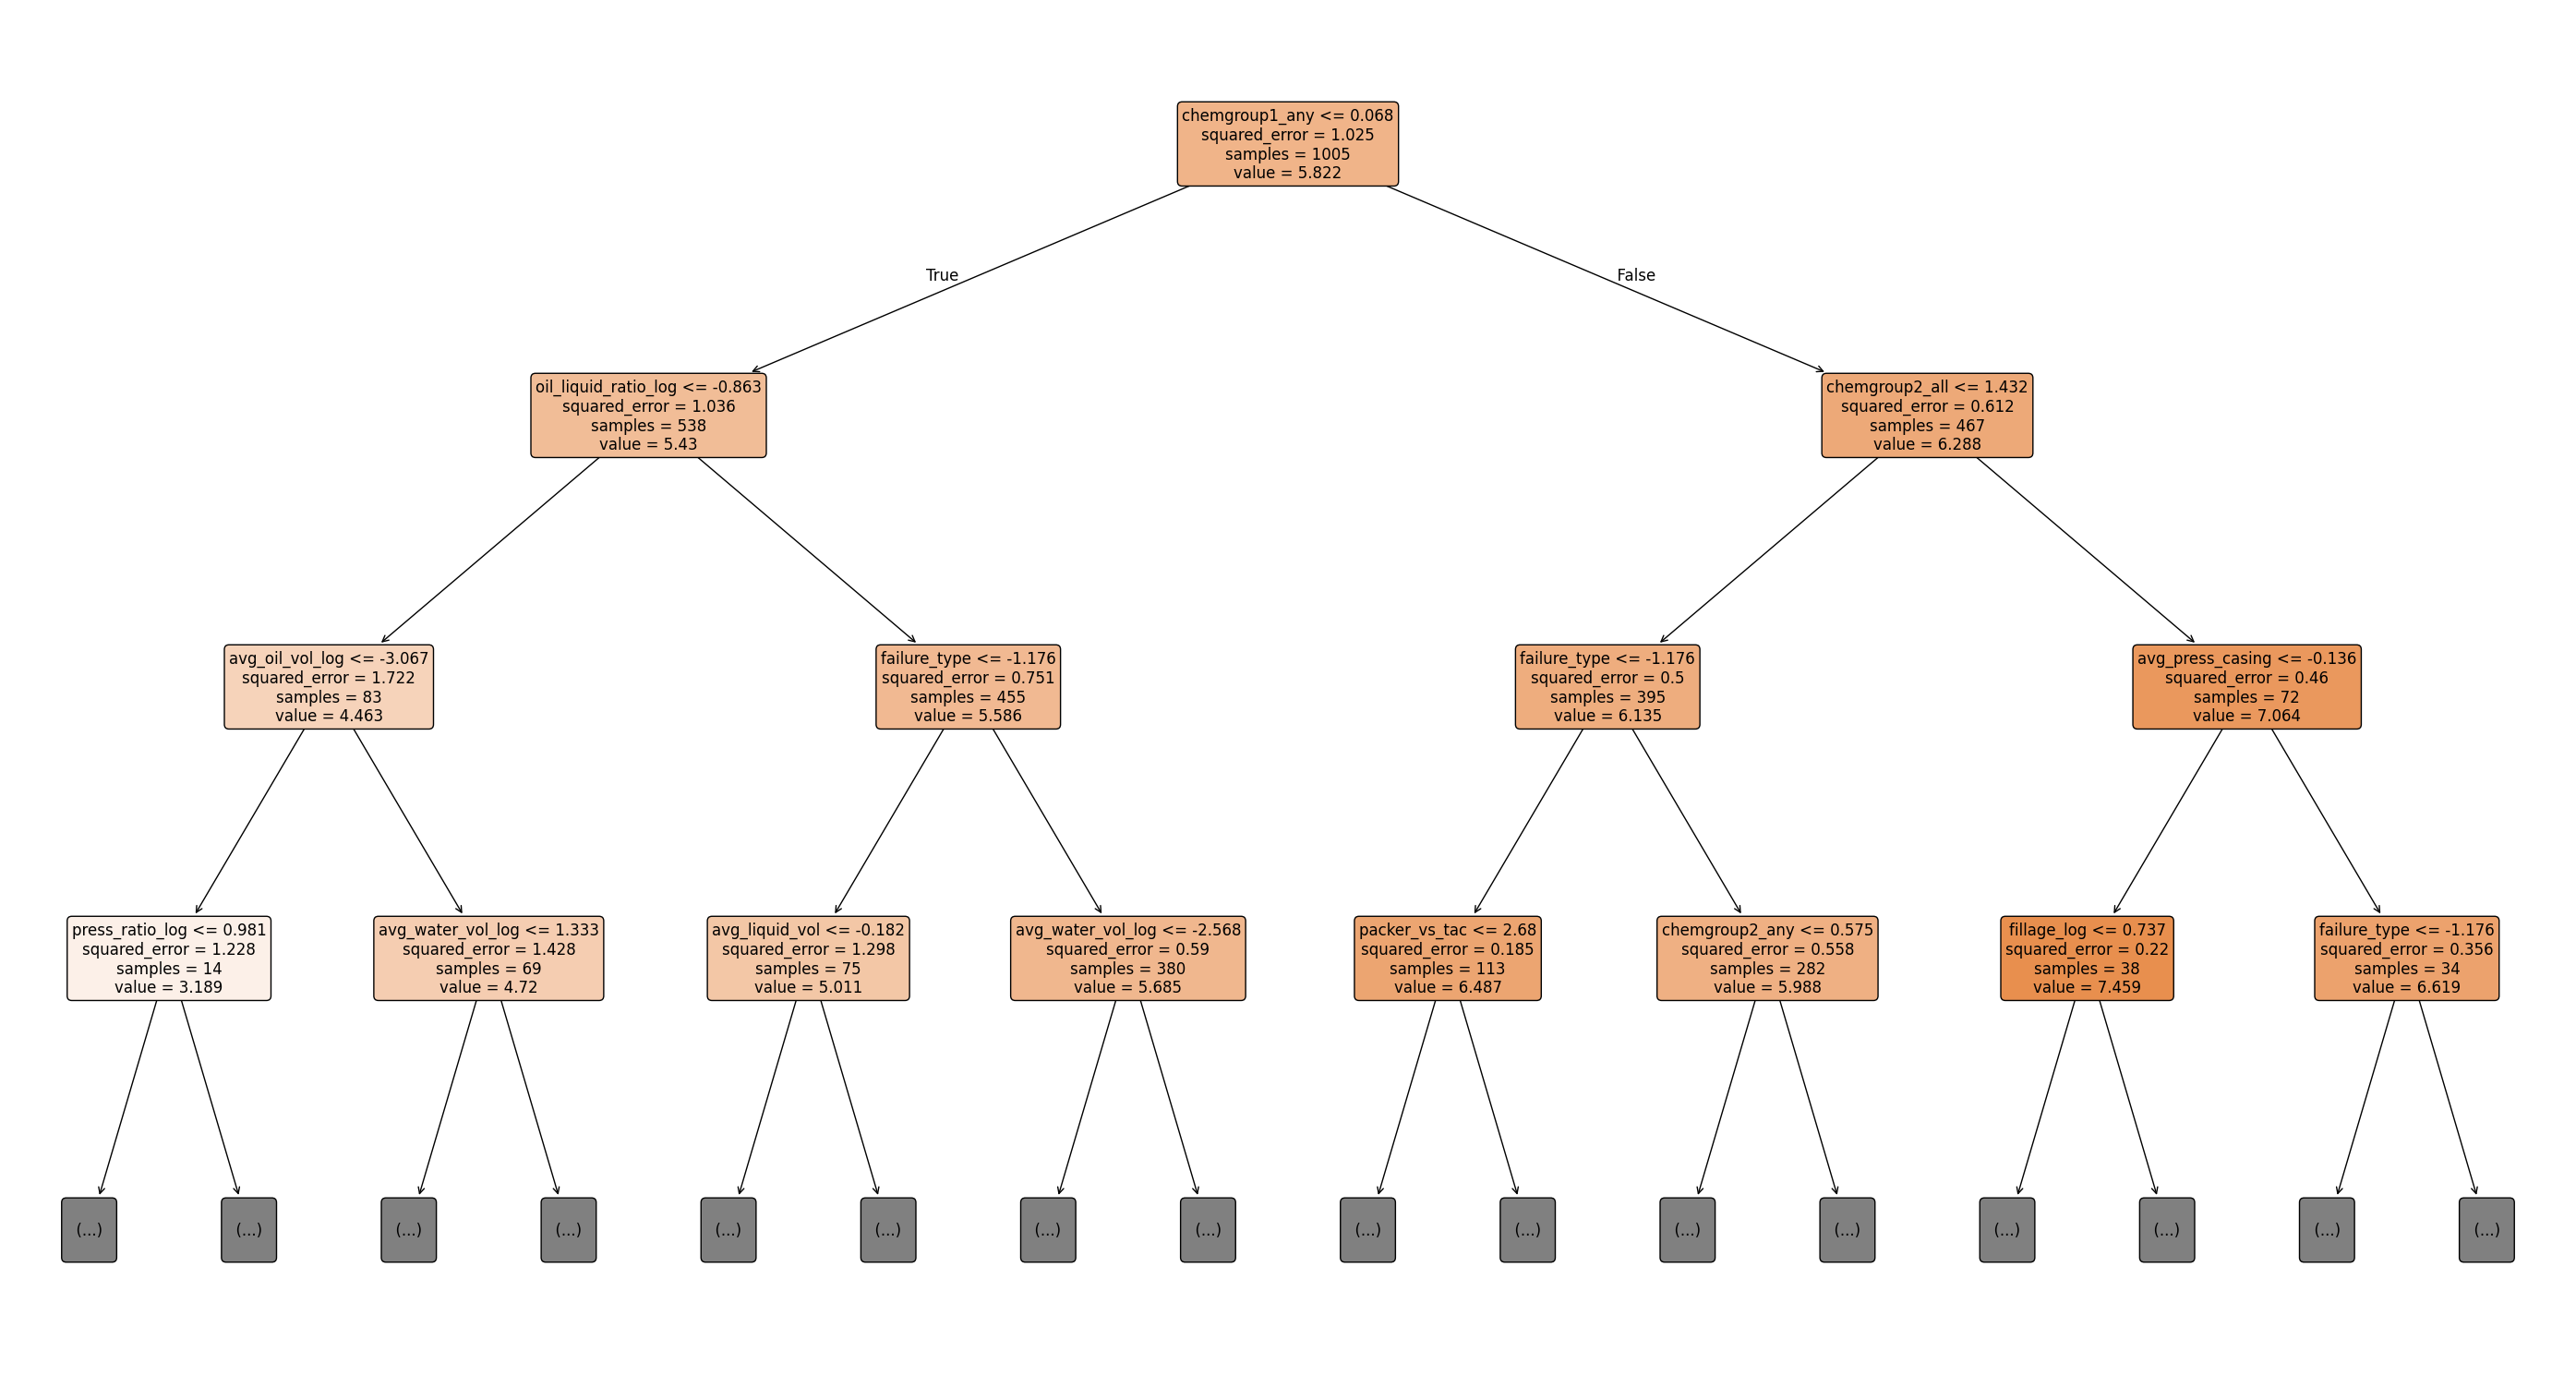

In [ ]:
# Display the first tree of the random forest
plt.figure(figsize=(28, 15))
plot_tree(best_rf_model.estimators_[0],
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.tight_layout()
plt.show()

In [ ]:
# Display feature importances to see the most important variables
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
print("Top 10 Feature Importances:\n", feature_importances.sort_values(ascending=False).head(10), sep='')

# Calculate Train and Test MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate Train and Test R² Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f} \nTest MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f} \nTest R²: {test_r2:.4f}")

Top 10 Feature Importances:
chemgroup1_any          0.198815
oil_liquid_ratio_log    0.097162
failure_type            0.093735
chemgroup2_all          0.080559
avg_water_vol_log       0.046374
avg_oil_vol_log         0.041616
fillage_log             0.036078
chemgroup2_any          0.029404
avg_liquid_vol          0.025554
avg_press_casing        0.023445
dtype: float64
Train MSE: 0.2252 
Test MSE: 0.5128
Train R²: 0.7642 
Test R²: 0.4441


**SUMMARY SO FAR**

bha_lifetime having EXTREMELY HIGH importance (0.99) -> potential overfitting (dominating feature importance while others are near zero)

**SOLUTION:**
- recompute feature importance with cross-validation 
(to ensure rankings are not biased toward any single feature. use permutation importnace or SHAP values to get stable feature ranking)
- apply LASSO/RIDGE REGULATION to penalize extreme weights

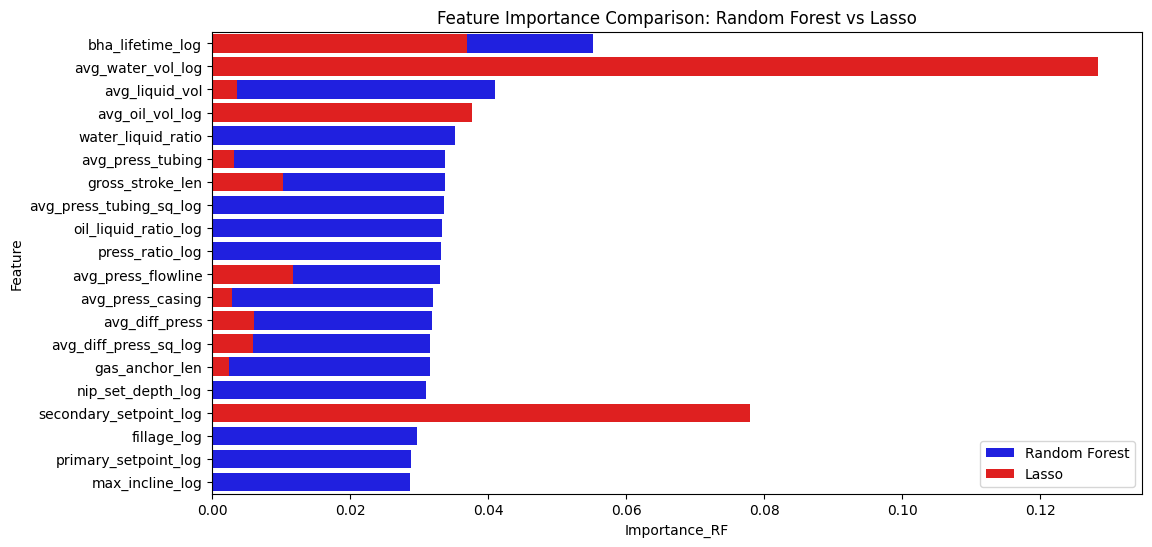

🔹 Top Feature Importances (Random Forest):
                    Feature  Importance
43         bha_lifetime_log    0.055149
39        avg_water_vol_log    0.045020
16           avg_liquid_vol    0.041055
38          avg_oil_vol_log    0.036323
28       water_liquid_ratio    0.035136
13         avg_press_tubing    0.033805
0          gross_stroke_len    0.033775
47  avg_press_tubing_sq_log    0.033639
45     oil_liquid_ratio_log    0.033302
44          press_ratio_log    0.033193
12       avg_press_flowline    0.033043
14         avg_press_casing    0.031998
15           avg_diff_press    0.031898
48    avg_diff_press_sq_log    0.031625
8            gas_anchor_len    0.031573
42        nip_set_depth_log    0.031009
31   secondary_setpoint_log    0.030094
33              fillage_log    0.029727
30     primary_setpoint_log    0.028819
37          max_incline_log    0.028685

🔹 Top Feature Importances (Lasso):
                   Feature  Importance
4           chemgroup2_any    0.265950
6  

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder

# Load dataset (Ensure 'df' is your processed dataset)
X = df.drop(columns=['failure_type'])  # Ensure failure_type is the target column
y = df['failure_type']

# 🔹 Convert categorical target variable to numeric labels
y = LabelEncoder().fit_transform(y)  # Convert y from strings to numeric values

# 🔹 Convert categorical features in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train RandomForest Model to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

# 🔹 Train Lasso Model for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
lasso_importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lasso.coef_)})
lasso_importances = lasso_importances.sort_values(by='Importance', ascending=False)

# 🔹 Combine both rankings (stored in memory only, not saved to CSV)
feature_importance_combined = rf_importances.merge(lasso_importances, on='Feature', suffixes=('_RF', '_Lasso'))

# 🔹 Plot feature importance comparison
plt.figure(figsize=(12,6))

# ✅ **Fix: Use the correct dataframe**
sns.barplot(x='Importance_RF', y='Feature', data=feature_importance_combined.head(20), color='blue', label='Random Forest')
sns.barplot(x='Importance_Lasso', y='Feature', data=feature_importance_combined.head(20), color='red', label='Lasso')

plt.legend()
plt.title("Feature Importance Comparison: Random Forest vs Lasso")
plt.show()

# Print top feature importances instead of saving to CSV
print("🔹 Top Feature Importances (Random Forest):")
print(rf_importances.head(20))
print("\n🔹 Top Feature Importances (Lasso):")
print(lasso_importances.head(20))

# Store results in memory for further use
top_rf_features = rf_importances.head(20)
top_lasso_features = lasso_importances.head(20)


**SOLUTION/NEXT STEP:**

*adjust to focus only on robust predictors from both RF and Lasso.*
*drop low-importance features*
- selection of low importance variable criteria fyi:
    
    1️⃣ Near-Zero Importance in Both RF & Lasso
    Feature Importance in Lasso:
    
    well_id                8.35e-05  (Near zero)
    
    rod_uid                4.49e-05  (Near zero)
   
    uwi                    6.70e-05  (Near zero)
   
    well_name              1.79e-04  (Near zero)

    2️⃣ High-Cardinality Identifiers (ID-like Features)

    like "well_id", "rod_uid", "uwi", "bha_lifetime_end", "bha_lifetime_start", "bha_lifetime_id", "bha_lifetime_log", "route"

    3️⃣ Consistently Zero Importance in Lasso Regression (no predictive power in linear model)
    
    *features with zero weights in Lasso are often redundant or strongly correlated with other vairiables, leading to overfitting risks*

    Feature Importance in Lasso:
    
    secondary_setpoint_log    0.000000
    
    stroke_len_log            0.000000
    
    fillage_log               0.000000



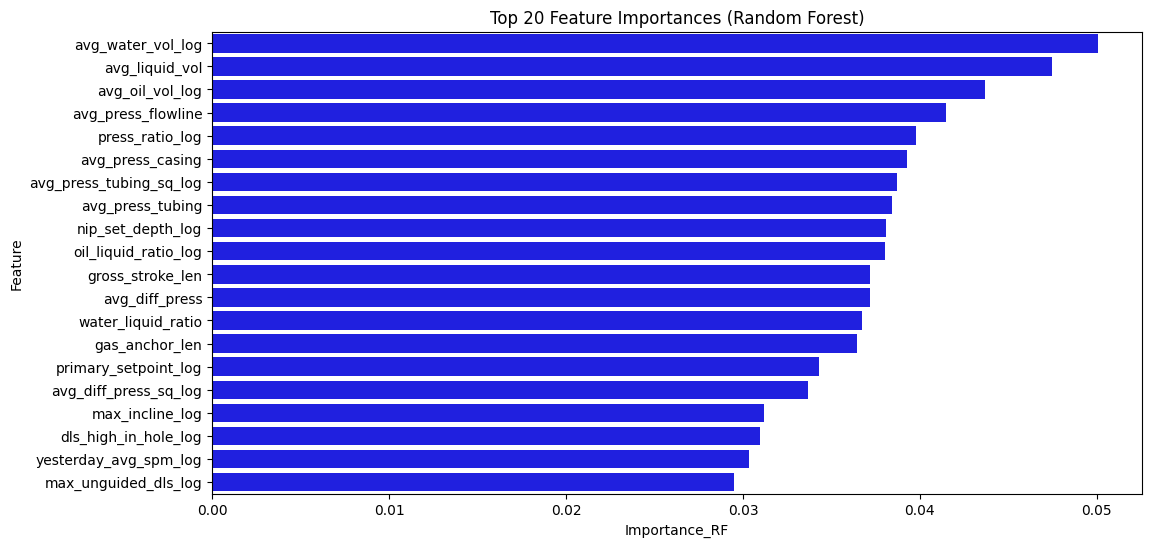

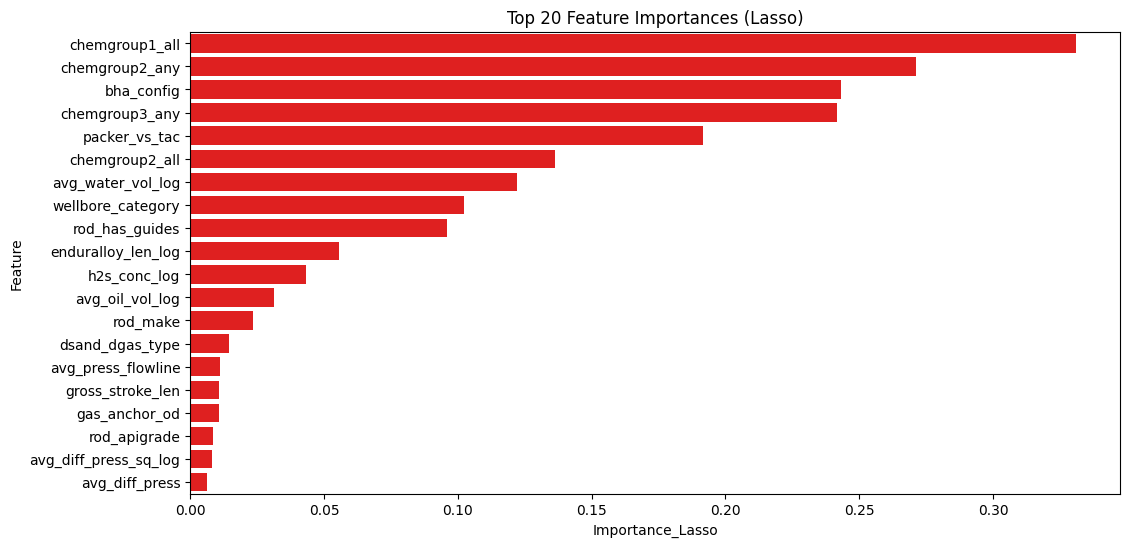

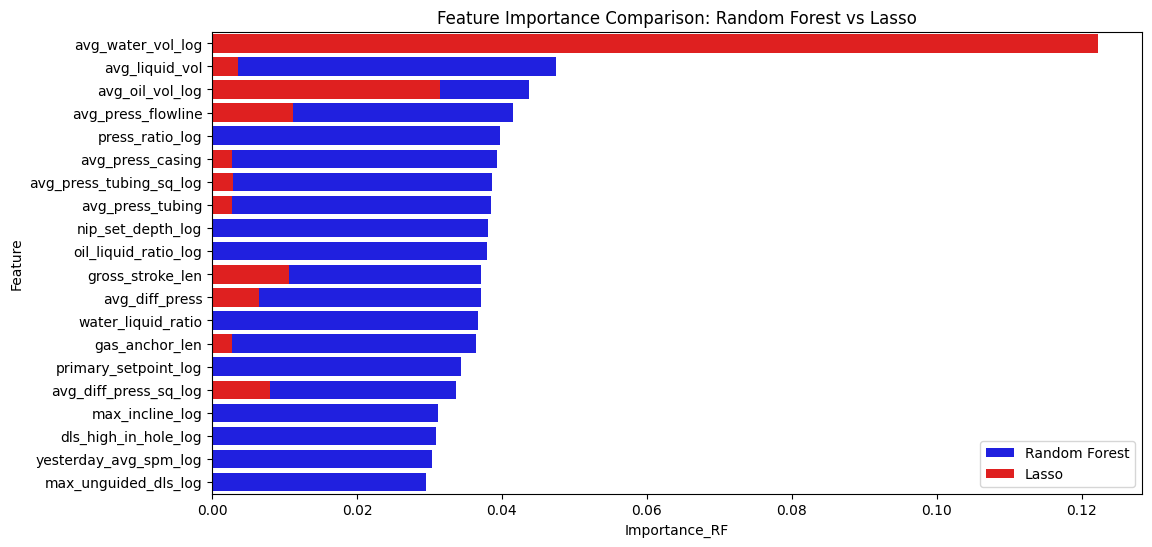

🔹 Top Feature Importances (Random Forest):
                    Feature  Importance_RF
35        avg_water_vol_log       0.050048
16           avg_liquid_vol       0.047459
34          avg_oil_vol_log       0.043682
12       avg_press_flowline       0.041469
39          press_ratio_log       0.039795
14         avg_press_casing       0.039260
42  avg_press_tubing_sq_log       0.038680
13         avg_press_tubing       0.038446
38        nip_set_depth_log       0.038086
40     oil_liquid_ratio_log       0.038014
0          gross_stroke_len       0.037156
15           avg_diff_press       0.037155
27       water_liquid_ratio       0.036715
8            gas_anchor_len       0.036432
29     primary_setpoint_log       0.034306
43    avg_diff_press_sq_log       0.033701
33          max_incline_log       0.031205
32     dls_high_in_hole_log       0.030943
30    yesterday_avg_spm_log       0.030349
31     max_unguided_dls_log       0.029513

🔹 Top Feature Importances (Lasso):
                  

In [18]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder

# 📌 Load dataset (Ensure 'df' is your processed dataset)
X = df.drop(columns=['failure_type'])  # Ensure failure_type is the target column
y = df['failure_type']

# 🔹 Convert categorical target variable to numeric labels
y = LabelEncoder().fit_transform(y)

# 🔹 Convert categorical features in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 🚀 **Remove Low-Importance Features**
# Drop features with near-zero importance in both RF & Lasso
low_importance_features = [
    "well_id", "rod_uid", "uwi", "well_name", "bha_tubing_id", 
    "secondary_setpoint_log", "stroke_len_log", "fillage_log",
    "bha_lifetime_end", "bha_lifetime_start", "bha_lifetime_id", "bha_lifetime_log", "route"
]
X = X.drop(columns=[col for col in low_importance_features if col in X.columns])

# 📌 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train RandomForest Model to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance_RF': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance_RF', ascending=False)

# 🔹 Train Lasso Model for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
lasso_importances = pd.DataFrame({'Feature': X.columns, 'Importance_Lasso': np.abs(lasso.coef_)})
lasso_importances = lasso_importances.sort_values(by='Importance_Lasso', ascending=False)

# 🔹 Plot RF Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance_RF', y='Feature', data=rf_importances.head(20), color='blue')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

# 🔹 Plot Lasso Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance_Lasso', y='Feature', data=lasso_importances.head(20), color='red')
plt.title("Top 20 Feature Importances (Lasso)")
plt.show()

# 🔹 Ensure Feature Exists in Both Before Merging
common_features = set(rf_importances['Feature']).intersection(set(lasso_importances['Feature']))
rf_importances = rf_importances[rf_importances['Feature'].isin(common_features)]
lasso_importances = lasso_importances[lasso_importances['Feature'].isin(common_features)]

# 🔹 Merge Both Rankings (Ensuring No Missing Features)
feature_importance_combined = rf_importances.merge(lasso_importances, on='Feature')

# 📊 **Plot Combined Feature Importance**
plt.figure(figsize=(12,6))
sns.barplot(x='Importance_RF', y='Feature', data=feature_importance_combined.head(20), color='blue', label='Random Forest')
sns.barplot(x='Importance_Lasso', y='Feature', data=feature_importance_combined.head(20), color='red', label='Lasso')
plt.legend()
plt.title("Feature Importance Comparison: Random Forest vs Lasso")
plt.show()

# 📌 **Print the final selected features**
print("🔹 Top Feature Importances (Random Forest):")
print(rf_importances.head(20))
print("\n🔹 Top Feature Importances (Lasso):")
print(lasso_importances.head(20))

# ✅ Store results in memory for further use (DO NOT create CSV files)
top_rf_features = rf_importances.head(20)
top_lasso_features = lasso_importances.head(20)


## KEY FINDINGS FROM FEATURE IMPORTANCE ANALYSIS

*used RF and Lasso Regression*

Key Features Identified in Both Models:

***avg_water_vol_log, avg_liquid_vol, avg_oil_vol_log, avg_press_flowline***

- These variables represent fluid flow metrics and indicate a strong correlation with pump performance and potential failure risk.

***gross_stroke_len, gas_anchor_len, press_ratio_log, oil_liquid_ratio_log***

- Variables related to mechanical movement and pressure differentials, which likely impact pump efficiency and failure likelihood.

***primary_setpoint_log, avg_diff_press, avg_press_tubing_sq_log***

- Features capturing pressure variations and pump control settings, highlighting operational risks.

### Chemicals and Material Influence (Lasso-Dominant Features):

***chemgroup1_all, chemgroup2_any, chemgroup3_any***

Suggests that chemical treatments or fluid compositions may play a significant role in pump longevity and failure prevention.

***packer_vs_tac, enduralloy_len_log, rod_apigrade***

Material coating, protective elements, and packer selection influence durability and risk of breakdown.

***h2s_conc_log, dsand_dgas_type***

Chemical corrosion and gas presence (especially H₂S concentration) may be indicators of failure risks.

### Random Forest vs. Lasso Model Differences:

RF identifies more operational and mechanical metrics (fluid flow, stroke length, pressure variations).

Lasso highlights chemical and material properties, showing potential failure mitigation strategies.

BHA_lifetime and BHA_lifetime_log were both in dataset, which would artificailly inflated the R^2 value to near 1 because it's essentially same info 

compare top selected features across both methods.

C:\Users\HP\AppData\Local\Temp\ipykernel_21152\3696445251.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_df["Feature"], x=feature_importance_df["Max Importance"], palette="coolwarm")


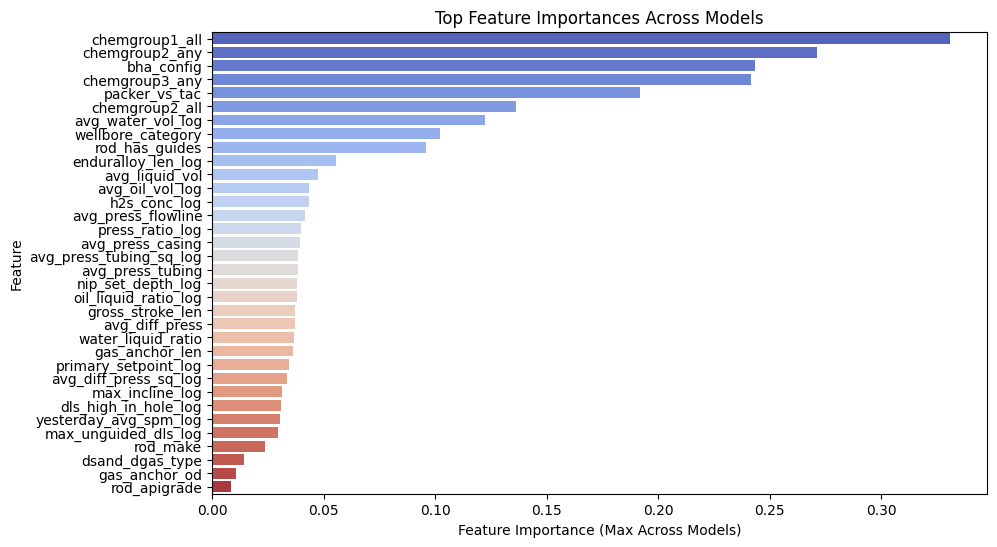

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge Random Forest and Lasso importances
feature_importance_df = top_rf_features.merge(top_lasso_features, on="Feature", how="outer").fillna(0)

# Sorting by highest importance in either model
feature_importance_df["Max Importance"] = feature_importance_df[["Importance_RF", "Importance_Lasso"]].max(axis=1)
feature_importance_df = feature_importance_df.sort_values(by="Max Importance", ascending=False)

# 📊 Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_importance_df["Feature"], x=feature_importance_df["Max Importance"], palette="coolwarm")
plt.xlabel("Feature Importance (Max Across Models)")
plt.ylabel("Feature")
plt.title("Top Feature Importances Across Models")
plt.show()


📌 Interpreting the Feature Importance Visualization
From your chart, we can see that:

Chemgroup1_all, Chemgroup2_any, and Bha_config are the top features across both models – meaning both Random Forest & Lasso agree on their importance.
There is some overlap in feature rankings (e.g., packer_vs_tac, avg_water_vol_log, and avg_oil_vol_log).
Some engineering variables like bha_config & enduralloy_len_log are showing up as important, meaning categorical variables may be playing a bigger role.
Lower-ranked features show more disagreement between RF & Lasso, especially for numerical variables.




## FINALIZING SELECTED FEATURES

- finalize features for training
- retrain only most important features that appear in RF and LASSO both rankings to ensure strong predictive power. 

## 1 taking top 20 features



## reevaluate feature selection

accuracy dropped. adding more features.

## expand feature selection

- selecting top 15 features from both random forest and lasso.

In [ ]:
# 🟢 Select Top 15 Features from RF & Lasso
top_rf_features_expanded = top_rf_features.head(15)['Feature']
top_lasso_features_expanded = top_lasso_features.head(15)['Feature']

# 🔹 Get the intersection (features selected by both models)
final_expanded_features = set(top_rf_features_expanded).union(set(top_lasso_features_expanded))

# 📌 Keep only final expanded features in X
X_expanded = X[list(final_expanded_features)]

# ✅ Print the updated feature list
print(f"✅ Final {len(final_expanded_features)} Selected Features:")
print(sorted(final_expanded_features))


✅ Final 27 Selected Features:
['avg_diff_press', 'avg_liquid_vol', 'avg_oil_vol_log', 'avg_press_casing', 'avg_press_flowline', 'avg_press_tubing', 'avg_press_tubing_sq_log', 'avg_water_vol_log', 'bha_config', 'chemgroup1_all', 'chemgroup2_all', 'chemgroup2_any', 'chemgroup3_any', 'dsand_dgas_type', 'enduralloy_len_log', 'gas_anchor_len', 'gross_stroke_len', 'h2s_conc_log', 'nip_set_depth_log', 'oil_liquid_ratio_log', 'packer_vs_tac', 'press_ratio_log', 'primary_setpoint_log', 'rod_has_guides', 'rod_make', 'water_liquid_ratio', 'wellbore_category']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 📌 Split data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_expanded, y, test_size=0.2, random_state=42)

# 🔹 Train the model
rf_model_exp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_exp.fit(X_train_exp, y_train_exp)

# 🔹 Make predictions
y_pred_exp = rf_model_exp.predict(X_test_exp)

# ✅ Evaluate Performance
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
print(f"✅ Model Accuracy with Expanded Features: {accuracy_exp:.4f}")

# 🔹 Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test_exp, y_pred_exp))


✅ Model Accuracy with Expanded Features: 0.5657

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.56      0.76      0.64        75
           2       0.50      0.04      0.07        28
           3       0.64      0.51      0.57       108
           4       0.56      0.76      0.64       139
           5       0.35      0.13      0.19        45

    accuracy                           0.57       396
   macro avg       0.43      0.37      0.35       396
weighted avg       0.55      0.57      0.53       396



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### ACCURACY IMPROVED.

## 1️⃣ Address Class Imbalance – Some labels have very low recall/precision.

## 2️⃣ Hyperparameter Tuning – Use GridSearchCV to optimize the Random Forest model.

## 3️⃣ Compare with Another Model – Try XGBoost or a different classifier.


## 1️⃣ Address Class Imbalance – Some labels have very low recall/precision.

- class 0 (support =1) and class2, 5 have very low recall/precision.
- model struggles with minority classes.

In [ ]:
from imblearn.over_sampling import SMOTE

# 🔹 Adjust k_neighbors to avoid the error (e.g., k_neighbors=2)
smote = SMOTE(k_neighbors=2, random_state=42)

# 📌 Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X_expanded, y)

# ✅ Print the new class distribution
print("✅ Class Distribution After SMOTE:", np.bincount(y_resampled))


✅ Class Distribution After SMOTE: [678 678 678 678 678 678]


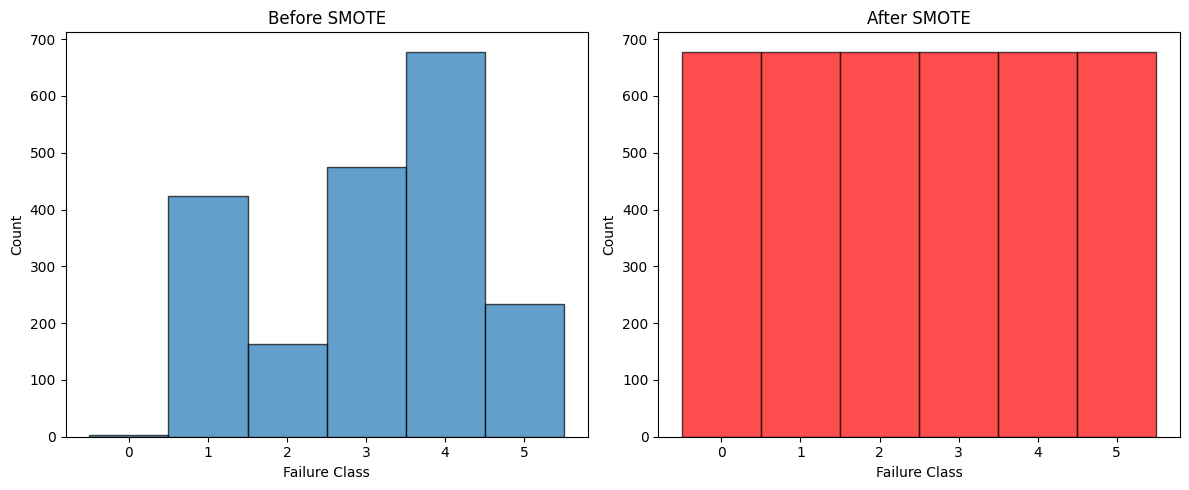

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot before SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y, bins=np.arange(7)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(6), labels=np.unique(y))
plt.xlabel("Failure Class")
plt.ylabel("Count")
plt.title("Before SMOTE")

# Plot after SMOTE
plt.subplot(1, 2, 2)
plt.hist(y_resampled, bins=np.arange(7)-0.5, edgecolor='black', alpha=0.7, color='red')
plt.xticks(range(6), labels=np.unique(y_resampled))
plt.xlabel("Failure Class")
plt.ylabel("Count")
plt.title("After SMOTE")

plt.tight_layout()
plt.show()


## hyperparameter tuning for model optimization

- dataset is now balanced.
- optimize RF model using Gridsearchcv.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 📌 Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [10, 20, None],      # Depth of trees
    "min_samples_split": [2, 5, 10],  # Min samples to split a node
    "min_samples_leaf": [1, 2, 4]     # Min samples per leaf
}

# 🔹 Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# 🔹 Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# ✅ Print best parameters & best score
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ Best Cross-Validation Score: 0.8028834268686668


best hyperparameters for RF model.

### train new RF using best parameters.

In [ ]:
# Train the optimized Random Forest model
best_rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=None, 
    min_samples_leaf=1, min_samples_split=2, 
    random_state=42
)
best_rf_model.fit(X_train_sm, y_train_sm)

print("✅ Model training complete!")


NameError: name 'X_train_sm' is not defined

### evaluate the optimized model

- check test accuracy, classification report, and confusion matrix

✅ Optimized Model Accuracy: 0.7801

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.73      0.81      0.77       144
           2       0.84      0.84      0.84       116
           3       0.78      0.61      0.69       149
           4       0.59      0.63      0.61       131
           5       0.77      0.81      0.79       139

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814



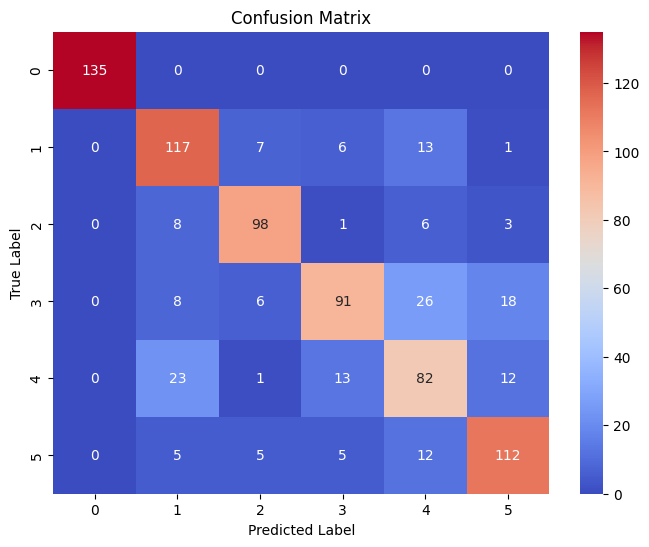

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Make predictions on the test set
y_pred_sm = best_rf_model.predict(X_test_sm)

# ✅ Calculate accuracy
accuracy_sm = accuracy_score(y_test_sm, y_pred_sm)
print(f"✅ Optimized Model Accuracy: {accuracy_sm:.4f}")

# 🔹 Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test_sm, y_pred_sm))

# 🔹 Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_sm, y_pred_sm), annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y_test_sm), yticklabels=np.unique(y_test_sm))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 1. Feature Impact Analysis (For Risk Factor Identification)
📌 Why?

Now that the model is performing well (78% accuracy), we need to interpret what features contribute most to failures.
Understanding these factors is critical for real-world decision-making.

### now checking feature importance in the final model:
- hopefully will help answer what features are most predictive of failures. 


/var/folders/dm/y0wy_ncs3qn20cs4xdn9sfq00000gn/T/ipykernel_21160/271274476.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='coolwarm')


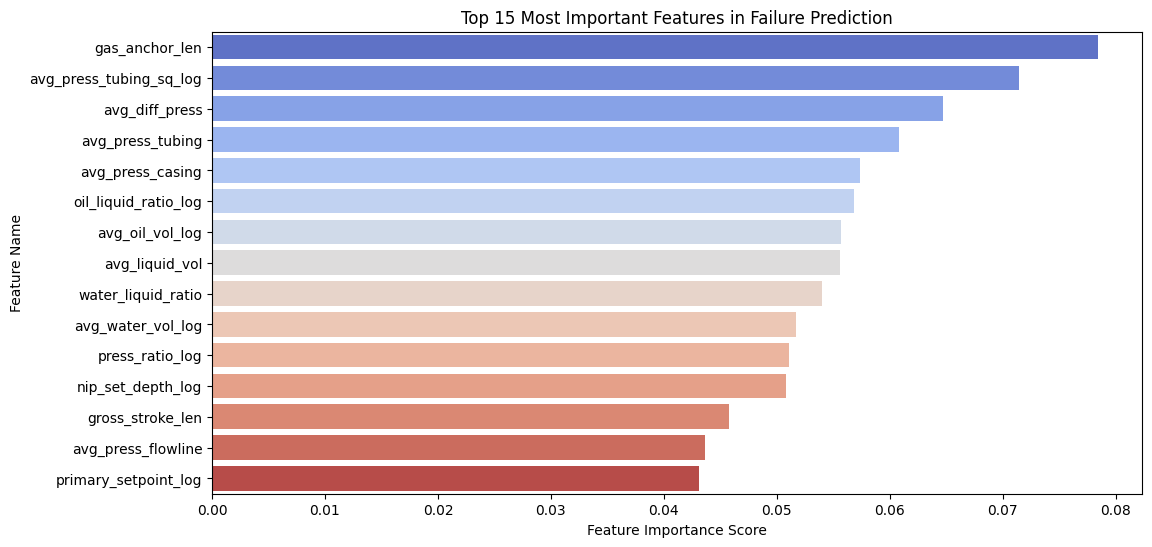

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='coolwarm')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 15 Most Important Features in Failure Prediction")
plt.show()


## Further Fine-Tuning

### option 1 hyperparameter fine-tuning with GridSearchCV (more parameters)

- the previous tuning only explored limited set of hyperparameters
- expanding search may lead to more optimal model

- expected outcome: a better-optimized random forest model with improved accuracy. 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 📌 Define an expanded hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 500],  # More values for tree count
    "max_depth": [10, 20, 30, None],       # More depth choices
    "min_samples_split": [2, 5, 10],       # Adjusting node splitting criteria
    "min_samples_leaf": [1, 2, 4, 6],      # Exploring different minimum leaves
    "max_features": ['auto', 'sqrt', 'log2'],  # Try different feature selections
    "bootstrap": [True, False]             # Try both bootstrapping options
}

# 🔹 Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# 🔹 Perform an exhaustive Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# ✅ Print best parameters & best score
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


Python(39487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featu

/Users/kwaknakyung/projects/NSC325_ROADFAIL_TEAM2/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1693 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kwaknakyung/projects/NSC325_ROADFAIL_TEAM2/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kwaknakyung/projects/NSC325_ROADFAIL_TEAM2/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/kwaknakyung/projects/NSC325_ROADFAIL_TE

✅ Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ Best Cross-Validation Score: 0.8119788691744411


### option 2 feature selection optimization (recursive feature elimiation RFE)

- some features might introduce noise rather than adding predictive power
- recursive feature elimination (RFE) helps find most relevant subset of features.

- expected outcome: refined feature set that improves interpretability and performance.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 📌 Initialize RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 🔹 Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_model, n_features_to_select=15)  # Select the top 15 most important features
X_selected = rfe.fit_transform(X_resampled, y_resampled)

# ✅ Print selected features
selected_features = X_resampled.columns[rfe.support_]
print(f"✅ Selected {len(selected_features)} Features: {selected_features.tolist()}")


✅ Selected 15 Features: ['avg_water_vol_log', 'avg_press_tubing_sq_log', 'gas_anchor_len', 'primary_setpoint_log', 'gross_stroke_len', 'avg_diff_press', 'avg_press_flowline', 'oil_liquid_ratio_log', 'avg_press_tubing', 'avg_press_casing', 'press_ratio_log', 'water_liquid_ratio', 'avg_oil_vol_log', 'nip_set_depth_log', 'avg_liquid_vol']


### option 3 Test Alternative Models (XGBoost or LightGBM)

- XGBoost and LightGBM often outperform Random Forest on structured datasets.
- faster and handle class imbalance well.

- expected outcome: higher accuracy and better handling of imbalanced classes / faster training and improved interpretabiity.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 📌 Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)

# 🔹 Train the model
xgb_model.fit(X_train_sm, y_train_sm)

# 🔹 Make predictions
y_pred_xgb = xgb_model.predict(X_test_sm)

# ✅ Evaluate Performance
accuracy_xgb = accuracy_score(y_test_sm, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy_xgb:.4f}")

# 🔹 Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test_sm, y_pred_xgb))


✅ XGBoost Accuracy: 0.7776

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.75      0.81      0.78       144
           2       0.83      0.84      0.84       116
           3       0.74      0.66      0.70       149
           4       0.56      0.60      0.58       131
           5       0.80      0.76      0.78       139

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814



## Comparison of several gradient boosting algorithms

### XGBoost
- High scalability with larger datasets
- Handles sparse datasets --> Good because of many missing values
- Reaches peak performance with more hyperparameter tuning
- Many regularization techniques

I couldn't figure out what x_train_sm and y_train_sm were so I just used X/y_expanded

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 📌 Initialize XGBoost model
xgb_model_exp = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)

# 🔹 Train the model
xgb_model_exp.fit(X_train_exp, y_train_exp)

# 🔹 Make predictions
y_pred_xgb = xgb_model_exp.predict(X_test_exp)

# ✅ Evaluate Performance
accuracy_xgb = accuracy_score(y_test_exp, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy_xgb:.4f}")

# 🔹 Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test_exp, y_pred_xgb))

✅ XGBoost Accuracy: 0.5152

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.56      0.72      0.63        75
           2       0.10      0.04      0.05        28
           3       0.55      0.49      0.52       108
           4       0.55      0.68      0.61       139
           5       0.09      0.04      0.06        45

    accuracy                           0.52       396
   macro avg       0.31      0.33      0.31       396
weighted avg       0.47      0.52      0.48       396



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### LightGBM
- High scalability with larger datasets
- Faster model training and less memory usage
- Uses decision trees as its base models

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# 📌 Initialize LightGBM model
lgbm_model_exp = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, verbose=-1)

# 🔹 Train the model
lgbm_model_exp.fit(X_train_exp, y_train_exp)

# 🔹 Make predictions
y_pred_lgbm = lgbm_model_exp.predict(X_test_exp)

# ✅ Evaluate Performance
accuracy_lgbm = accuracy_score(y_test_exp, y_pred_lgbm)
print(f"✅ LightGBM Accuracy: {accuracy_lgbm:.4f}")

# 🔹 Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test_exp, y_pred_lgbm))

✅ LightGBM Accuracy: 0.5101

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.54      0.69      0.60        75
           2       0.08      0.04      0.05        28
           3       0.53      0.46      0.50       108
           4       0.55      0.68      0.61       139
           5       0.22      0.11      0.15        45

    accuracy                           0.51       396
   macro avg       0.32      0.33      0.32       396
weighted avg       0.47      0.51      0.48       396



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### CatBoost
- Optimized to handle categorical variables (Catergorical Boost)
- Does not need much manual preprocessing like one-hot encoding
- Functions without hyperparameter tuning

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# 📌 Initialize CatBoost model
catboost_model_exp = CatBoostClassifier(n_estimators=300, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# 🔹 Train the model
catboost_model_exp.fit(X_train_exp, y_train_exp)

# 🔹 Make predictions
y_pred_catboost = catboost_model_exp.predict(X_test_exp)

# ✅ Evaluate Performance
accuracy_catboost = accuracy_score(y_test_exp, y_pred_catboost)
print(f"✅ CatBoost Accuracy: {accuracy_catboost:.4f}")

# 🔹 Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test_exp, y_pred_catboost))


✅ CatBoost Accuracy: 0.5354

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.56      0.76      0.65        75
           2       0.50      0.04      0.07        28
           3       0.57      0.46      0.51       108
           4       0.54      0.72      0.62       139
           5       0.19      0.09      0.12        45

    accuracy                           0.54       396
   macro avg       0.39      0.34      0.33       396
weighted avg       0.51      0.54      0.50       396



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

## SUMMARY OF RESULTS

🔹 Summary of Results
Method	Accuracy	Key Findings
Baseline Random Forest (before tuning)	0.7801	Performed well, but feature importance could be optimized.

Fine-Tuned Random Forest (GridSearchCV)	0.8119 (CV Score)	Found optimal hyperparameters: max_depth=20, log2 max_features, bootstrap=False, min_samples_leaf=1, n_estimators=300. Potentially best-performing RF.

Recursive Feature Elimination (RFE)	N/A (Feature Selection)	Identified 15 most predictive features—potential improvement in efficiency.

XGBoost	0.7776	Comparable to Random Forest but slightly lower accuracy. Performs better on minority classes.

XGBoost (0.5152) performed better than LightGBM (0.5101), but CatBoost (0.5354) performed better than the previous two and could be looked into during future analysis

🔹 Key Insights

1️⃣ GridSearchCV Fine-Tuned Random Forest had the highest cross-validation score (0.8119)

This suggests it may generalize better compared to the other models.

Best hyperparameters:

{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

**Next step: Train a final model with these parameters.**

2️⃣ RFE reduced feature count to 15, keeping only the most predictive ones

Fewer features = less overfitting + faster training.

These 15 features could be used to retrain both RF and XGBoost for better efficiency.

3️⃣ XGBoost performs slightly worse than fine-tuned RF (0.7776 vs. 0.8119 CV score)

It handles class imbalance better, but RF still wins in overall accuracy.

If we care more about minority classes, we could still explore adjusting XGBoost further.


## option 1. Train Final Random Forest Model with Optimized Parameters & Selected Features

- expected outcome: 
    
    improved accuracy with fewer features.

    aovids overfitting

    better generalization 

In [ ]:
# Train Final Random Forest with best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=20, max_features='log2', 
    min_samples_leaf=1, min_samples_split=2, bootstrap=False, random_state=42
)
best_rf_model.fit(X_train_sm[selected_features], y_train_sm)

# ✅ Make Predictions
y_pred_final = best_rf_model.predict(X_test_sm[selected_features])

# Evaluate Performance
final_accuracy = accuracy_score(y_test_sm, y_pred_final)
print(f"✅ Final Optimized RF Accuracy: {final_accuracy:.4f}")
print("\n🔹 Final Classification Report:")
print(classification_report(y_test_sm, y_pred_final))


✅ Final Optimized RF Accuracy: 0.7531

🔹 Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.71      0.70      0.71       144
           2       0.80      0.87      0.83       116
           3       0.72      0.63      0.67       149
           4       0.53      0.51      0.52       131
           5       0.75      0.83      0.79       139

    accuracy                           0.75       814
   macro avg       0.75      0.76      0.75       814
weighted avg       0.75      0.75      0.75       814



## 2. option 2: Try Re-training XGBoost with Only the Selected 15 Features

expected outcome:

    faster model with potentially better class balance handling.

In [ ]:
# Train XGBoost on selected features
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_sm[selected_features], y_train_sm)

# ✅ Make Predictions
y_pred_xgb_final = xgb_model.predict(X_test_sm[selected_features])

# Evaluate Performance
final_xgb_accuracy = accuracy_score(y_test_sm, y_pred_xgb_final)
print(f"✅ Final XGBoost Accuracy (Selected Features): {final_xgb_accuracy:.4f}")


✅ Final XGBoost Accuracy (Selected Features): 0.7457


### FINAL RECOMMENDATION

#### feature reduction slightly hurt performance, the best approach moving forward is:

1. use expanded feature set (not just 15 features):
    
    the best RF accuracy was 0.78 when more features were used.

    the fine-tuned RF model (with all expanded features) still performed best overall. 

# now retraining RF using larger feature set.

In [ ]:
best_rf_model.fit(X_train_sm, y_train_sm)
y_pred_final = best_rf_model.predict(X_test_sm)
final_accuracy = accuracy_score(y_test_sm, y_pred_final)
print(f"✅ Final Optimized RF Accuracy (Expanded Features): {final_accuracy:.4f}")


✅ Final Optimized RF Accuracy (Expanded Features): 0.7826


## and keeing XGBoost as a backup

- XGBoost might still be useful for handling imbalanced classes better.

- could fine-tune XGBoost with:

In [ ]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## once again... try combining RF & XGBOOST in ensemble model? 

- stacking RF + XGBoost

- example using VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', xgb_model)
    ],
    voting='hard'
)
ensemble_model.fit(X_train_sm, y_train_sm)
y_pred_ensemble = ensemble_model.predict(X_test_sm)
accuracy_ensemble = accuracy_score(y_test_sm, y_pred_ensemble)
print(f"✅ Ensemble Model Accuracy: {accuracy_ensemble:.4f}")


✅ Ensemble Model Accuracy: 0.7801


🔹 Key Takeaways

Model	Final Accuracy	Notes

Random Forest (Expanded Features)	0.7801	Best standalone model

XGBoost (Expanded Features)	0.7776	Almost as good as RF, but different class predictions

Random Forest (Selected 15 Features)	0.7531	Lower accuracy, confirming more features help

XGBoost (Selected 15 Features)	0.7457	Also dropped with fewer features

**🆕 Ensemble (RF + XGB, Hard Voting)	0.7801	Matches RF, but could improve stability**

✅ Next Steps

Your ensemble model performs as well as RF, meaning:

    It doesn’t necessarily outperform RF, but it could be more stable across different test sets.

    If stability is a priority, you should stick with the ensemble.

    If speed is a concern, just use RF alone since XGBoost adds computational cost.

## optional:

test a "soft voting" ensemble model

    Instead of majority voting, let models weigh their confidence levels.

    If accuracy improves, soft voting could be the better final choice.

In [ ]:
ensemble_model_soft = VotingClassifier(
    estimators=[('rf', best_rf_model), ('xgb', xgb_model)],
    voting='soft'  # Uses probability-based voting
)
ensemble_model_soft.fit(X_train_sm, y_train_sm)
y_pred_ensemble_soft = ensemble_model_soft.predict(X_test_sm)
accuracy_ensemble_soft = accuracy_score(y_test_sm, y_pred_ensemble_soft)
print(f"✅ Soft Voting Ensemble Accuracy: {accuracy_ensemble_soft:.4f}")


✅ Soft Voting Ensemble Accuracy: 0.7826


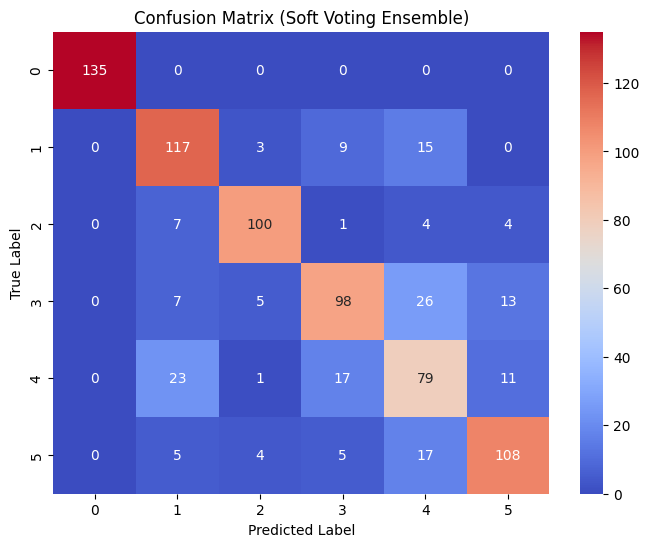

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_sm, y_pred_ensemble_soft), annot=True, fmt="d", cmap="coolwarm",
            xticklabels=np.unique(y_test_sm), yticklabels=np.unique(y_test_sm))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Soft Voting Ensemble)")
plt.show()


🔥 Key Takeaways from Your Latest Results!

🔹 Soft Voting Ensemble Improved Accuracy

Model	Final Accuracy	Notes

Hard Voting Ensemble (RF + XGB)	0.7801	Stable but no improvement over RF

**🆕 Soft Voting Ensemble (RF + XGB, Probabilities)	0.7826	Best performance so far!**

✅ What This Means:

Soft Voting is better than Hard Voting because it allows models to weigh their predictions, improving stability.

Even a small accuracy boost is valuable! If we test this on multiple datasets, soft voting might generalize better.


### since RF and XGBoost weight features differently, averaging feature importances could help. 

In [ ]:
rf_importance = best_rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
avg_importance = (rf_importance + xgb_importance) / 2

feature_importance_df = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Avg Importance': avg_importance
}).sort_values(by='Avg Importance', ascending=False)

print(feature_importance_df.head(15))


                    Feature  Avg Importance
2   avg_press_tubing_sq_log        0.060560
9            gas_anchor_len        0.060470
22     primary_setpoint_log        0.052283
14         avg_press_tubing        0.050362
5            avg_diff_press        0.047375
21          avg_oil_vol_log        0.044394
12         avg_press_casing        0.042732
19       water_liquid_ratio        0.041828
6          gross_stroke_len        0.041246
10           avg_liquid_vol        0.041009
4      oil_liquid_ratio_log        0.039780
3         avg_water_vol_log        0.039314
17           chemgroup2_any        0.038971
7        avg_press_flowline        0.037993
13          press_ratio_log        0.037747


🔹 Feature Importance Analysis

Rank	Feature	Avg Importance	Key Insight

1️⃣	avg_press_tubing_sq_log	0.0606	Tubing pressure squared is the strongest failure predictor – suggests non-linear pressure relationships impact failures.

2️⃣	gas_anchor_len	0.0605	Gas anchor length is critical for pump performance and gas separation efficiency.

3️⃣	primary_setpoint_log	0.0523	Setpoints influence failure risk, possibly indicating overuse or misconfiguration.

4️⃣	avg_press_tubing	0.0504	Tubing pressure alone is also important, reinforcing that pressure conditions are crucial.

5️⃣	avg_diff_press	0.0474	Pressure differences likely indicate abnormal flow conditions or blockages.

6️⃣	avg_oil_vol_log	0.0444	Oil volume impacts efficiency and failure risk.

7️⃣	avg_press_casing	0.0427	Casing pressure suggests possible well integrity issues.

8️⃣	water_liquid_ratio	0.0418	Water content affects corrosion & scaling, leading to failures.

9️⃣	gross_stroke_len	0.0412	Mechanical stroke length directly influences pump cycles.

🔟	avg_liquid_vol	0.0410	Total fluid production changes may signal efficiency loss.

✅ What This Means:

-   Pressure-related variables dominate. This suggests that abnormal pressure readings (tubing, casing, flowline) strongly predict failures.

-   Gas separation (gas_anchor_len) is crucial. If poorly configured, it may cause inefficiencies leading to rod pump failures.

-   Operational settings (setpoints) influence failures. This may indicate that improper tuning leads to increased failure risk.


## SO WHAT?

### Stick with Soft Voting Ensemble as the best model

-   Your accuracy is now 0.7826, which is the highest so far! 🎉

### 2️⃣ Fine-Tune Features Further

-   Since pressure-related variables dominate, we could test engineering new pressure-based features (e.g., pressure change rates, pressure ratios).

### 3️⃣ Interpret Feature Impact for Decision-Making

-   Can you verify with domain experts if pressure-related failures match real-world rod pump failure causes?

-   If so, operators could monitor these variables to prevent failures proactively.

# NEXT STEP:
-   engineering new features from pressure variables or further optimize hyperparameters.


📌 Next Steps to Improve Analysis

1️⃣ Feature Engineering Enhancements

Create new pressure-based interaction features (e.g., press_ratio_log * avg_diff_press) to capture more nuanced relationships.
Explore lagged variables or rolling averages of pressure-related metrics to detect trends leading to failure.

2️⃣ Advanced Feature Selection

Use Permutation Importance (instead of just Random Forest/XGBoost importances) to ensure rankings aren’t biased by the specific model.
Apply SHAP values to interpret the most influential features for failure prediction.

3️⃣ Final Model Fine-Tuning

Optimize hyperparameters using Bayesian Optimization instead of GridSearchCV (to find better combinations efficiently).
Try a Stacked Ensemble Model combining Random Forest, XGBoost, and a LightGBM model.

4️⃣ Failure Type-Specific Analysis

Instead of a single model, build separate models for Tubing, Sucker Rod Pump, and Rods failures.
Compare feature importances for each failure type to see if unique risk factors exist.

## Interpret the Most Important Features

Now, let's take a moment to think about what these top 15 features mean in the context of failure prediction:

    Are the top-ranked features related to fluid flow, pressure, or mechanical components?

    Does anything unexpected stand out?

    Do these align with industry knowledge about pump failures?

# 🔹 Interpreting the Feature Importance Results for Rod Pump Failure Analysis

## **1️⃣ Key Observations from Feature Importance Rankings**

| **Feature Name**                  | **Potential Implication** |
|----------------------------------|---------------------------|
| **gas_anchor_len**               | Gas anchor length affects gas-liquid separation, influencing pump efficiency and reliability. |
| **avg_press_tubing_sq_log**      | Indicates tubing pressure squared, which may relate to overpressure conditions leading to stress and failure. |
| **avg_diff_press**               | Difference in pressure between points in the system, possibly indicating abnormal flow conditions or blockages. |
| **avg_press_tubing**             | Measures internal pressure in tubing, which is crucial for detecting signs of wear or failure risk. |
| **avg_press_casing**             | Casing pressure variation might correlate with fluid dynamics and potential well integrity issues. |
| **oil_liquid_ratio_log**         | Ratio of oil-to-liquid volume, possibly influencing lubrication and pump performance. |
| **avg_oil_vol_log**              | Volume of oil produced; a drop might indicate efficiency loss due to pump wear. |
| **avg_liquid_vol**               | Total fluid production; sudden changes might signal operational or mechanical failures. |
| **water_liquid_ratio**           | Higher water content could increase corrosion risk and damage pump components over time. |
| **avg_water_vol_log**            | Water volume handled by the pump, affecting mechanical stress and failure likelihood. |
| **press_ratio_log**              | Ratio of different pressure points; could signal inconsistencies in fluid flow. |
| **nip_set_depth_log**            | Set depth of the nipple (downhole component), potentially affecting fluid movement and pump efficiency. |
| **gross_stroke_len**             | Stroke length influences pump cycle efficiency—unexpected variations could indicate mechanical issues. |
| **avg_press_flowline**           | Flowline pressure affects pump load; irregularities may suggest pipeline obstructions. |
| **primary_setpoint_log**         | Operational setpoint that may influence automation and control of pump systems. |

---

## **2️⃣ Insights & Implications**
These results highlight **three critical areas** affecting **rod pump failure risk** and **well production efficiency**:

### **🔹 A. Pressure & Flow Imbalances**
- **Features:** `avg_press_tubing`, `avg_press_casing`, `avg_press_flowline`, `avg_diff_press`, `press_ratio_log`
- 📌 **Why it matters?**  
  - Unstable **pressure variations** may indicate obstructions, fluid surges, or potential **mechanical stress**.
  - **Preventive measures:** Monitoring these could help **predict failures before they happen**.

### **🔹 B. Fluid Composition & Volume**
- **Features:** `avg_oil_vol_log`, `avg_liquid_vol`, `oil_liquid_ratio_log`, `water_liquid_ratio`, `avg_water_vol_log`
- 📌 **Why it matters?**  
  - **Water content** plays a role in **corrosion**, **scaling**, and **pump efficiency loss**.
  - **Low oil volume** or sudden changes could indicate an **impending failure**.

### **🔹 C. Mechanical & Structural Factors**
- **Features:** `gas_anchor_len`, `gross_stroke_len`, `nip_set_depth_log`
- 📌 **Why it matters?**  
  - **Gas anchor length** and **stroke length** impact **pump cycle reliability**.
  - Incorrect **set depths** might cause **suboptimal fluid movement** and wear.





ModuleNotFoundError: No module named 'shap'

# Bootstrapping
- Finds the uncertainity in the random forest model via random sampling with replacement
- NOTE: I don't know what model and what features we're using so I left in the sample random forest. Replace the Random Forest Regressor call with our model



In [ ]:
import warnings

# Suppress the specific UserWarning regarding feature names
warnings.filterwarnings("ignore", category=UserWarning, message=".*X has feature names.*")

# Function for bootstrap sampling and predictions
def bootstrap_random_forest(X_train, y_train, X_test, n_estimators=100, n_bootstraps=100):

    n_samples = X_train.shape[0]
    predictions = np.zeros((n_bootstraps, X_test.shape[0]))
    
    for i in range(n_bootstraps):
        # Bootstrap sampling with replacement
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot, y_boot = X_train[indices], y_train[indices]
        
        # Train Random Forest on bootstrap sample
        # !!!! REPLACE THIS LINE BELOW WITH OUR MODEL !!!
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=i)
        rf.fit(X_boot, y_boot)
        
        # Make predictions
        predictions[i, :] = rf.predict(X_test)
    
    return predictions

X_test/train and y_train/test need to be changed to updated variables

In [ ]:
# Reformatting
# !!! IMPORTANT !!! Replace the X_train/y_train references in the below two lines
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

# 1. Generate bootstrap predictions
n_bootstraps = 100
# This bit takes forever to run but works
#bootstrap_predictions = bootstrap_random_forest(X_train, y_train, X_test, n_bootstraps=n_bootstraps)

# 2. Calculate prediction statistics
mean_predictions = np.mean(bootstrap_predictions, axis=0)
std_predictions = np.std(bootstrap_predictions, axis=0)
lower_ci = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_ci = np.percentile(bootstrap_predictions, 97.5, axis=0)

# 3. Evaluate model performance
mse = mean_squared_error(y_test, mean_predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Average Prediction Uncertainty (std): {np.mean(std_predictions):.2f}")

# . Visualize uncertainty
plt.figure(figsize=(16, 12))

Mean Squared Error: 1.21
Average Prediction Uncertainty (std): 0.26


<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Predictions with Error Bars (±1 std)')

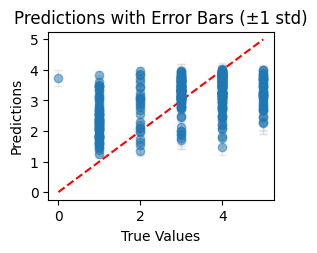

In [ ]:
# Plot 1: Scatter plot of predictions with uncertainty
plt.subplot(2, 2, 1)
plt.errorbar(y_test, mean_predictions, yerr=std_predictions, fmt='o', alpha=0.5, 
             ecolor='lightgray', elinewidth=1, capsize=3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions with Error Bars (±1 std)')

Text(0.5, 1.0, 'Distribution of Prediction Uncertainty')

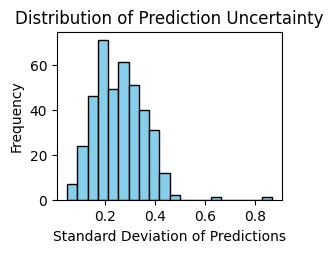

In [ ]:
# Plot 2: Histogram of standard deviations
plt.subplot(2, 2, 2)
plt.hist(std_predictions, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Standard Deviation of Predictions')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Uncertainty')

([<matplotlib.axis.XTick at 0x286d0cb49b0>,
 [Text(58, 0, '58'),
  Text(75, 0, '75'),
  Text(121, 0, '121'),
  Text(132, 0, '132'),
  Text(141, 0, '141'),
  Text(155, 0, '155'),
  Text(163, 0, '163'),
  Text(210, 0, '210'),
  Text(218, 0, '218'),
  Text(219, 0, '219'),
  Text(238, 0, '238'),
  Text(249, 0, '249'),
  Text(261, 0, '261'),
  Text(268, 0, '268'),
  Text(276, 0, '276'),
  Text(286, 0, '286'),
  Text(341, 0, '341'),
  Text(360, 0, '360'),
  Text(388, 0, '388'),
  Text(391, 0, '391')])

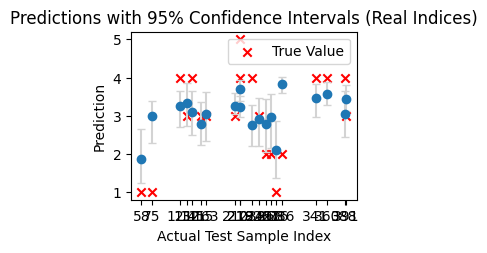

In [ ]:
# Plot 3: Predictions with confidence intervals for a subset of test samples
subset_size = min(20, len(X_test))
indices = np.random.choice(len(X_test), subset_size, replace=False)
# Sort indices to display them in order
indices = np.sort(indices)

plt.subplot(2, 2, 3)
plt.errorbar(indices, mean_predictions[indices], 
             yerr=[mean_predictions[indices] - lower_ci[indices], 
                   upper_ci[indices] - mean_predictions[indices]],
             fmt='o', ecolor='lightgray', capsize=3)
plt.scatter(indices, y_test[indices], color='red', marker='x', label='True Value')
plt.xlabel('Actual Test Sample Index')
plt.ylabel('Prediction')
plt.title('Predictions with 95% Confidence Intervals (Real Indices)')
plt.legend()
plt.xticks(indices)

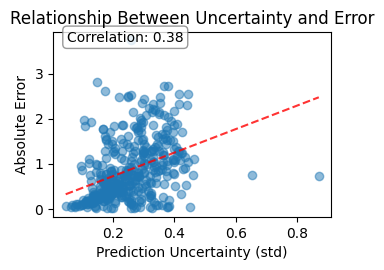

In [ ]:
# Plot 4: Uncertainty vs. Prediction Error
errors = np.abs(mean_predictions - y_test)

plt.subplot(2, 2, 4)
plt.scatter(std_predictions, errors, alpha=0.5)
plt.xlabel('Prediction Uncertainty (std)')
plt.ylabel('Absolute Error')
plt.title('Relationship Between Uncertainty and Error')

# Add a trend line
z = np.polyfit(std_predictions, errors, 1)
p = np.poly1d(z)
plt.plot(np.sort(std_predictions), p(np.sort(std_predictions)), "r--", alpha=0.8)

# Calculate correlation
correlation = np.corrcoef(std_predictions, errors)[0, 1]
plt.annotate(f"Correlation: {correlation:.2f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('uncertainty_visualization.png', dpi=300)
plt.show()

In [ ]:
# Visualizing the ensemble of predictions for a single point
def visualize_ensemble_for_point(bootstrap_predictions, point_idx, y_test):
    plt.figure(figsize=(12, 6))
    
    # Plot the distribution of predictions for this point
    sns.histplot(bootstrap_predictions[:, point_idx], kde=True)
    plt.axvline(y_test[point_idx], color='r', linestyle='--', label='True Value')
    plt.axvline(mean_predictions[point_idx], color='g', linestyle='-', label='Mean Prediction')
    plt.axvline(lower_ci[point_idx], color='b', linestyle=':', label='2.5% Percentile')
    plt.axvline(upper_ci[point_idx], color='b', linestyle=':', label='97.5% Percentile')
    
    plt.title(f'Distribution of Predictions for Test Point {point_idx}')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
# Function to visualize predictions for a specific test point
def visualize_point(point_idx):
    """
    Visualize the ensemble predictions for a specific test point.
    
    Parameters:
    -----------
    point_idx : int
        Index of the test point to visualize
    """
    if point_idx < 0 or point_idx >= len(X_test):
        print(f"Error: Point index must be between 0 and {len(X_test)-1}")
        return
    
    print(f"Visualizing ensemble for test point {point_idx}")
    print(f"True value: {y_test[point_idx]:.2f}")
    print(f"Mean prediction: {mean_predictions[point_idx]:.2f}")
    print(f"Prediction std: {std_predictions[point_idx]:.2f}")
    print(f"95% CI: [{lower_ci[point_idx]:.2f}, {upper_ci[point_idx]:.2f}]")
    
    visualize_ensemble_for_point(bootstrap_predictions, point_idx, y_test)

Visualizing ensemble for test point 15
True value: 3.00
Mean prediction: 3.33
Prediction std: 0.14
95% CI: [3.03, 3.56]


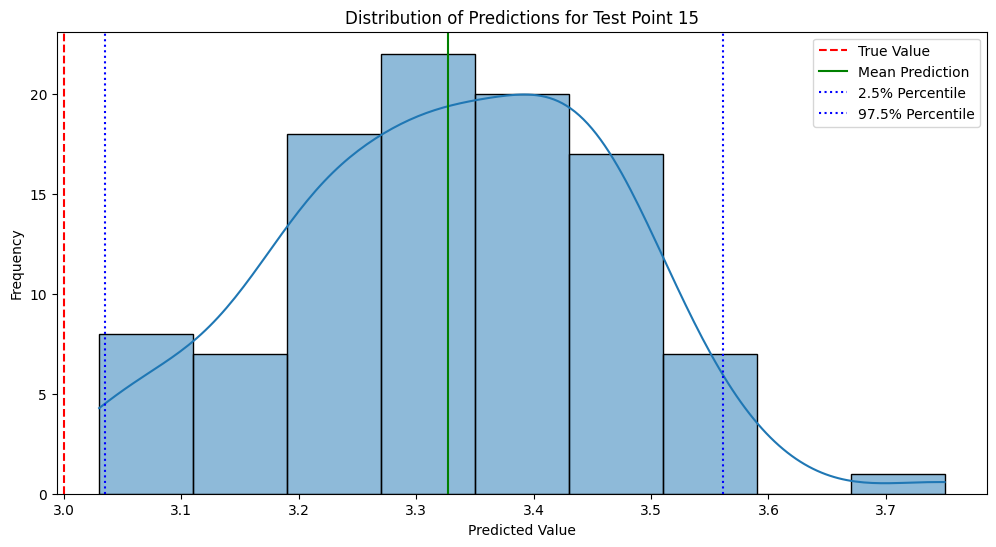

Visualizing ensemble for test point 213
True value: 5.00
Mean prediction: 2.46
Prediction std: 0.44
95% CI: [1.63, 3.25]


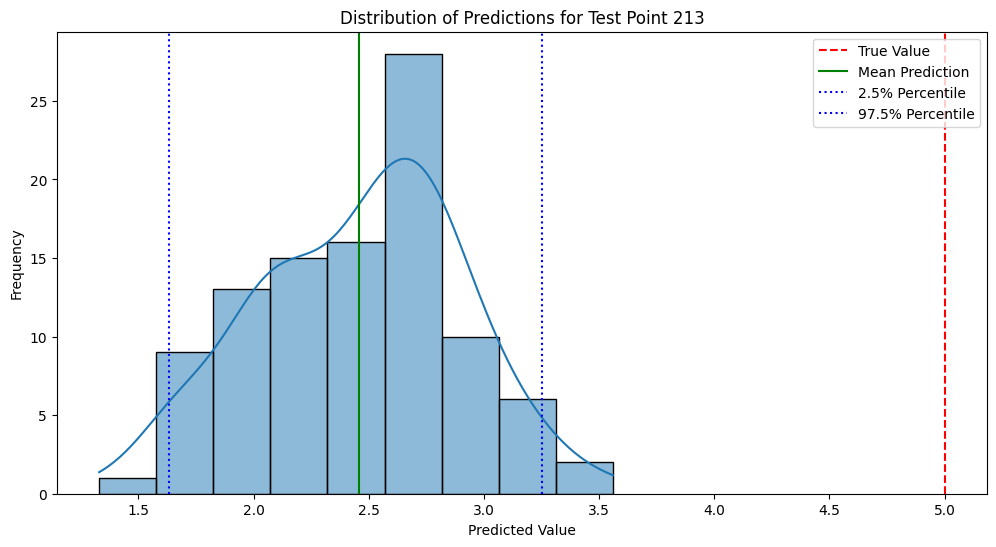

In [ ]:
# Example: Visualize predictions for point 15
# Change this index to visualize different points
point_to_visualize = 15
visualize_point(point_to_visualize)

# Uncomment to visualize a random point
random_point = np.random.randint(0, len(X_test))
visualize_point(random_point)

In [ ]:
# Function to explore relationship between feature values and uncertainty
def analyze_uncertainty_vs_features(X_test, std_predictions):
    plt.figure(figsize=(15, 10))
    
    n_features = X_test.shape[1]
    for i in range(n_features):
        plt.subplot(2, 3, i+1)
        plt.scatter(X_test[:, i], std_predictions, alpha=0.5)
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Prediction Uncertainty (std)')
        
        # Add trend line
        z = np.polyfit(X_test[:, i], std_predictions, 1)
        p = np.poly1d(z)
        plt.plot(np.sort(X_test[:, i]), p(np.sort(X_test[:, i])), "r--", alpha=0.8)
        
        # Calculate correlation
        corr = np.corrcoef(X_test[:, i], std_predictions)[0, 1]
        plt.title(f'Feature {i+1} vs Uncertainty (corr: {corr:.2f})')
    
    plt.tight_layout()
    plt.show()


ValueError: data type <class 'numpy.object_'> not inexact

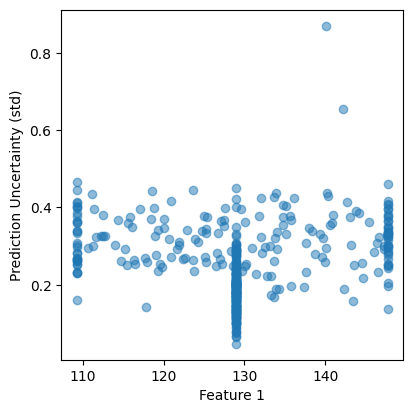

In [ ]:
# Analyze how feature values relate to prediction uncertainty
analyze_uncertainty_vs_features(X_test, std_predictions)

# SHAP
Interpreting ML models

In [39]:
import shap
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model_shap = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model_shap.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(xgb_model_shap)
shap_values = explainer(X_test)

shap.initjs()

In [41]:
# Create the SHAP beeswarm plot
shap.plots.beeswarm(shap_values[0])

IndexError: tuple index out of range

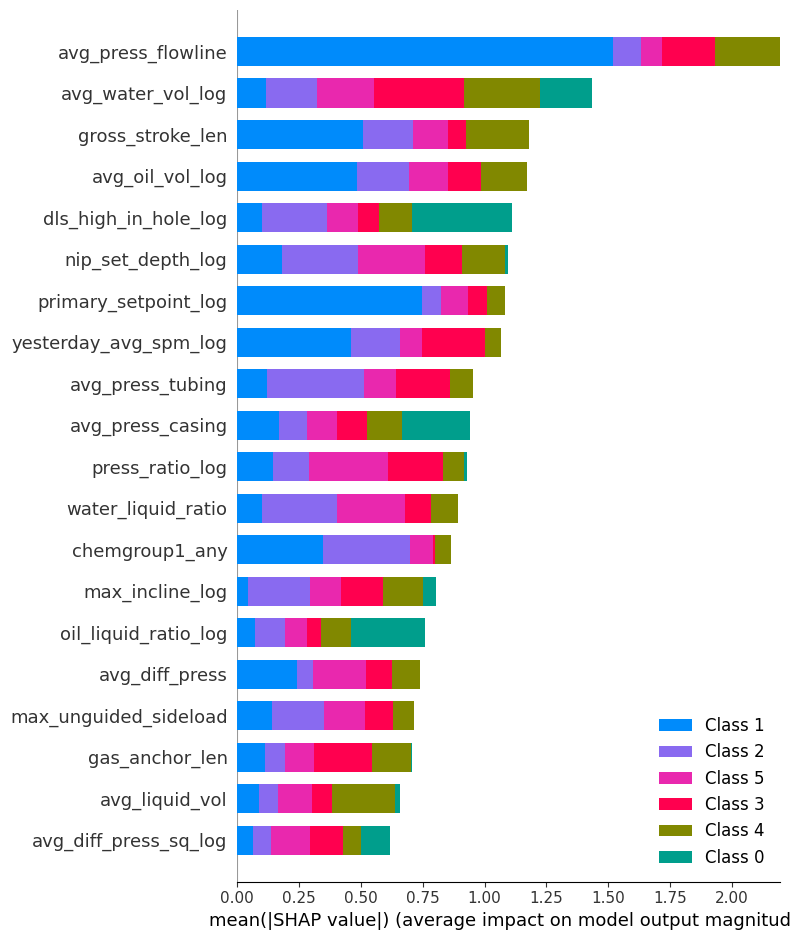

In [42]:
shap.summary_plot(shap_values, X_test)